#### MIcro Credit Defaulter Project

In [232]:
!pip install imbalanced-learn

###### Import Libraries

In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import f_oneway
%matplotlib inline

from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.preprocessing import LabelEncoder,StandardScaler

from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
import timeit
import warnings
warnings.filterwarnings('ignore')


###### Load Dataset

In [234]:
start = timeit.default_timer()
pd.pandas.set_option('display.max_columns',None)
df=pd.read_csv('E:\Data Trained_ Training\Micro-Credit-Project\Micro Credit Project\Data file.csv')
stop = timeit.default_timer()
print(stop - start)

1.3393776000011712


###### Dimension of Dataset

In [235]:
df.shape

(209593, 37)

*Observation :*<br>*IN this dataset there are 209593 rows and 37 columns*

###### Sample of Dataset

In [236]:
df.head()

Unnamed: 0  label       msisdn    aon  daily_decr30  daily_decr90  \
0           1      0  21408I70789  272.0   3055.050000   3065.150000   
1           2      1  76462I70374  712.0  12122.000000  12124.750000   
2           3      1  17943I70372  535.0   1398.000000   1398.000000   
3           4      1  55773I70781  241.0     21.228000     21.228000   
4           5      1  03813I82730  947.0    150.619333    150.619333   

   rental30  rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  \
0    220.13    260.13                2.0                0.0              1539   
1   3691.26   3691.26               20.0                0.0              5787   
2    900.13    900.13                3.0                0.0              1539   
3    159.42    159.42               41.0                0.0               947   
4   1098.90   1098.90                4.0                0.0              2309   

   cnt_ma_rech30  fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0              2          21.0             3078.0                1539.0   
1              1           0.0             5787.0                5787.0   
2              1           0.0             1539.0                1539.0   
3              0           0.0                0.0                   0.0   
4              7           2.0            20029.0                2309.0   

   medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
0                  7.50              2            21               3078   
1                 61.04              1             0               5787   
2                 66.32              1             0               1539   
3                  0.00              1             0                947   
4                 29.00              8             2              23496   

   medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  fr_da_rech30  \
0                1539.0                  7.50            0.0           0.0   
1                5787.0                 61.04            0.0           0.0   
2                1539.0                 66.32            0.0           0.0   
3                 947.0                  2.50            0.0           0.0   
4                2888.0                 35.00            0.0           0.0   

   cnt_da_rech90  fr_da_rech90  cnt_loans30  amnt_loans30  maxamnt_loans30  \
0              0             0            2            12              6.0   
1              0             0            1            12             12.0   
2              0             0            1             6              6.0   
3              0             0            2            12              6.0   
4              0             0            7            42              6.0   

   medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                 0.0          2.0            12                6   
1                 0.0          1.0            12               12   
2                 0.0          1.0             6                6   
3                 0.0          2.0            12                6   
4                 0.0          7.0            42                6   

   medianamnt_loans90  payback30  payback90 pcircle       pdate  
0                 0.0  29.000000  29.000000     UPW  2016-07-20  
1                 0.0   0.000000   0.000000     UPW  2016-08-10  
2                 0.0   0.000000   0.000000     UPW  2016-08-19  
3                 0.0   0.000000   0.000000     UPW  2016-06-06  
4                 0.0   2.333333   2.333333     UPW  2016-06-22

###### Breif Infomation About Data

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

*Observation :*<br>*In this dataset there are 21 float type columns, 13 int type columns, 3 object type columns*
<br>*every columns have 209593 non null value so there are no Nan value*

###### Statistical Summary of Data

In [238]:
#for numerical variable

In [239]:
df.describe(exclude='object')

Unnamed: 0          label            aon   daily_decr30  \
count  209593.000000  209593.000000  209593.000000  209593.000000   
mean   104797.000000       0.875177    8112.343445    5381.402289   
std     60504.431823       0.330519   75696.082531    9220.623400   
min         1.000000       0.000000     -48.000000     -93.012667   
25%     52399.000000       1.000000     246.000000      42.440000   
50%    104797.000000       1.000000     527.000000    1469.175667   
75%    157195.000000       1.000000     982.000000    7244.000000   
max    209593.000000       1.000000  999860.755168  265926.000000   

        daily_decr90       rental30       rental90  last_rech_date_ma  \
count  209593.000000  209593.000000  209593.000000      209593.000000   
mean     6082.515068    2692.581910    3483.406534        3755.847800   
std     10918.812767    4308.586781    5770.461279       53905.892230   
min       -93.012667  -23737.140000  -24720.580000         -29.000000   
25%        42.692000     280.420000     300.260000           1.000000   
50%      1500.000000    1083.570000    1334.000000           3.000000   
75%      7802.790000    3356.940000    4201.790000           7.000000   
max    320630.000000  198926.110000  200148.110000      998650.377733   

       last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30   fr_ma_rech30  \
count      209593.000000     209593.000000  209593.000000  209593.000000   
mean         3712.202921       2064.452797       3.978057    3737.355121   
std         53374.833430       2370.786034       4.256090   53643.625172   
min           -29.000000          0.000000       0.000000       0.000000   
25%             0.000000        770.000000       1.000000       0.000000   
50%             0.000000       1539.000000       3.000000       2.000000   
75%             0.000000       2309.000000       5.000000       6.000000   
max        999171.809410      55000.000000     203.000000  999606.368132   

       sumamnt_ma_rech30  medianamnt_ma_rech30  medianmarechprebal30  \
count      209593.000000         209593.000000         209593.000000   
mean         7704.501157           1812.817952           3851.927942   
std         10139.621714           2070.864620          54006.374433   
min             0.000000              0.000000           -200.000000   
25%          1540.000000            770.000000             11.000000   
50%          4628.000000           1539.000000             33.900000   
75%         10010.000000           1924.000000             83.000000   
max        810096.000000          55000.000000         999479.419319   

       cnt_ma_rech90   fr_ma_rech90  sumamnt_ma_rech90  medianamnt_ma_rech90  \
count   209593.00000  209593.000000      209593.000000         209593.000000   
mean         6.31543       7.716780       12396.218352           1864.595821   
std          7.19347      12.590251       16857.793882           2081.680664   
min          0.00000       0.000000           0.000000              0.000000   
25%          2.00000       0.000000        2317.000000            773.000000   
50%          4.00000       2.000000        7226.000000           1539.000000   
75%          8.00000       8.000000       16000.000000           1924.000000   
max        336.00000      88.000000      953036.000000          55000.000000   

       medianmarechprebal90  cnt_da_rech30   fr_da_rech30  cnt_da_rech90  \
count         209593.000000  209593.000000  209593.000000  209593.000000   
mean              92.025541     262.578110    3749.494447       0.041495   
std              369.215658    4183.897978   53885.414979       0.397556   
min             -200.000000       0.000000       0.000000       0.000000   
25%               14.600000       0.000000       0.000000       0.000000   
50%               36.000000       0.000000       0.000000       0.000000   
75%               79.310000       0.000000       0.000000       0.000000   
max            41456.500000   99914.441420  999809.240107      38.0

In [240]:
#for Categorical variable

In [241]:
df.describe(include=[object])

msisdn pcircle       pdate
count        209593  209593      209593
unique       186243       1          82
top     04581I85330     UPW  2016-07-04
freq              7  209593        3150

*Observation :*<br>*Columns means is less then Std, min values is in negaztive, all quartile value is zero or less difference, max values is very large value so dataset have abnormalities*

###### check for unique values in columns

In [242]:
df.nunique()

Unnamed: 0              209593
label                        2
msisdn                  186243
aon                       4507
daily_decr30            147026
daily_decr90            158670
rental30                132148
rental90                141033
last_rech_date_ma         1186
last_rech_date_da         1174
last_rech_amt_ma            70
cnt_ma_rech30               71
fr_ma_rech30              1083
sumamnt_ma_rech30        15141
medianamnt_ma_rech30       510
medianmarechprebal30     30428
cnt_ma_rech90              110
fr_ma_rech90                89
sumamnt_ma_rech90        31771
medianamnt_ma_rech90       608
medianmarechprebal90     29785
cnt_da_rech30             1066
fr_da_rech30              1072
cnt_da_rech90               27
fr_da_rech90                46
cnt_loans30                 40
amnt_loans30                48
maxamnt_loans30           1050
medianamnt_loans30           6
cnt_loans90               1110
amnt_loans90                69
maxamnt_loans90              3
medianam

*Observation :*<br>*label,medianamnt_loans30,maxamnt_loans90,medianamnt_loans90,pcircle columns have less than 20 unique*
<br>*values so they are categorical variables. And rest are countinuious variables*

###### check for missing values in columns

In [243]:
df.isnull().sum().sum()

0

*Observation :*<br>*No missing values*

###### check for duplicate rows

In [244]:
sum(df.duplicated())

0

*Observation :*<br>*No duplicate rows*

###### check for zeros in columns

In [245]:
print(df[df==0].count())

Unnamed: 0                   0
label                    26162
msisdn                       0
aon                          0
daily_decr30              4144
daily_decr90              4063
rental30                  7566
rental90                  6918
last_rech_date_ma        20743
last_rech_date_da       202861
last_rech_amt_ma         20995
cnt_ma_rech30            27979
fr_ma_rech30             78683
sumamnt_ma_rech30        27979
medianamnt_ma_rech30     27979
medianmarechprebal30     30680
cnt_ma_rech90            20950
fr_ma_rech90             65753
sumamnt_ma_rech90        20950
medianamnt_ma_rech90     20950
medianmarechprebal90     23391
cnt_da_rech30           205479
fr_da_rech30            208014
cnt_da_rech90           204226
fr_da_rech90            208728
cnt_loans30               3259
amnt_loans30              3259
maxamnt_loans30           3244
medianamnt_loans30      195445
cnt_loans90               2036
amnt_loans90              2043
maxamnt_loans90           2043
medianam

In [246]:
#% of Zero as values

In [247]:
print("Total % of Zeros as Value in Columns")
df[df==0].count()/df.shape[0]*100   

Total % of Zeros as Value in Columns


Unnamed: 0               0.000000
label                   12.482287
msisdn                   0.000000
aon                      0.000000
daily_decr30             1.977165
daily_decr90             1.938519
rental30                 3.609853
rental90                 3.300683
last_rech_date_ma        9.896800
last_rech_date_da       96.788061
last_rech_amt_ma        10.017033
cnt_ma_rech30           13.349205
fr_ma_rech30            37.540853
sumamnt_ma_rech30       13.349205
medianamnt_ma_rech30    13.349205
medianmarechprebal30    14.637893
cnt_ma_rech90            9.995563
fr_ma_rech90            31.371754
sumamnt_ma_rech90        9.995563
medianamnt_ma_rech90     9.995563
medianmarechprebal90    11.160201
cnt_da_rech30           98.037148
fr_da_rech30            99.246635
cnt_da_rech90           97.439323
fr_da_rech90            99.587295
cnt_loans30              1.554918
amnt_loans30             1.554918
maxamnt_loans30          1.547762
medianamnt_loans30      93.249775
cnt_loans90   

*Observation :*<br>*Zero as value is almost in every column need to check its missing value or alias value*

###### Identification of variables

In [248]:
#numerical variables

In [249]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))

Number of numerical variables:  34


In [250]:
##---check for descrete variable

In [251]:
descrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Descrete Variables Count: {}".format(len(descrete_feature)),"\n")

for feature in descrete_feature:
    print('The feature is {} and number of numerical are {}'.format(feature,len(df[feature].unique())))

Descrete Variables Count: 4 

The feature is label and number of numerical are 2
The feature is medianamnt_loans30 and number of numerical are 6
The feature is maxamnt_loans90 and number of numerical are 3
The feature is medianamnt_loans90 and number of numerical are 6


In [252]:
##---check for countinuous variable

In [253]:
continuous_feature=[feature for feature in numerical_features if feature not in descrete_feature ]
print("Continuous Variables Count {}".format(len(continuous_feature)),"\n")

for feature in continuous_feature:
    print('The feature is:  {}     and number of numerical are:  {}'.format(feature,len(df[feature].unique())))

Continuous Variables Count 30 

The feature is:  Unnamed: 0     and number of numerical are:  209593
The feature is:  aon     and number of numerical are:  4507
The feature is:  daily_decr30     and number of numerical are:  147026
The feature is:  daily_decr90     and number of numerical are:  158670
The feature is:  rental30     and number of numerical are:  132148
The feature is:  rental90     and number of numerical are:  141033
The feature is:  last_rech_date_ma     and number of numerical are:  1186
The feature is:  last_rech_date_da     and number of numerical are:  1174
The feature is:  last_rech_amt_ma     and number of numerical are:  70
The feature is:  cnt_ma_rech30     and number of numerical are:  71
The feature is:  fr_ma_rech30     and number of numerical are:  1083
The feature is:  sumamnt_ma_rech30     and number of numerical are:  15141
The feature is:  medianamnt_ma_rech30     and number of numerical are:  510
The feature is:  medianmarechprebal30     and number of 

In [254]:
#categorical variable

In [255]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
print('Number of Categorical variables: ', len(categorical_features))

Number of Categorical variables:  3


In [256]:
##---Binary variable

In [257]:
binary_feature=[feature for feature in categorical_features if len(df[feature].unique())==2 or len(df[feature].unique())<2 and feature not in numerical_features]
print("Binary Variables Count: {}".format(len(binary_feature)))

Binary Variables Count: 1


In [258]:
for feature in binary_feature:
    print(feature," : ", df[feature].unique())

pcircle  :  ['UPW']


In [259]:
##--- for nominal variable

In [260]:
nominal_feature=[feature for feature in categorical_features if feature not in binary_feature]
print("Nominal feature Count {}".format(len(nominal_feature)))

Nominal feature Count 2


In [261]:
for feature in nominal_feature:
    print('The feature is {} and number of numerical are {}'.format(feature,len(df[feature].unique())))

The feature is msisdn and number of numerical are 186243
The feature is pdate and number of numerical are 82


*Observation :*<br>*In this dataset there are 34 Numerical Variable in which 4 are descrete and 30 are continuous*
<br>*and 3 Categorical variable in which 1 is binary and 2 is nominal*

###### check for cardinality for Categorical variable

Text(0.5, 1.0, 'Cardinality')

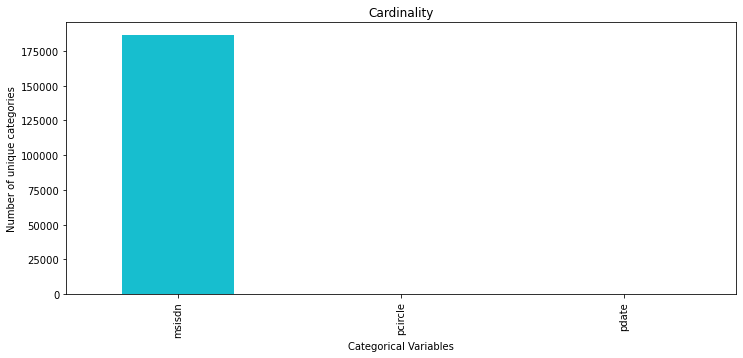

In [262]:
df[categorical_features].nunique().plot.bar(figsize=(12,5),color='#17becf')
plt.ylabel('Number of unique categories')
plt.xlabel('Categorical Variables')
plt.title('Cardinality')

*Observation :*<br>*msisdn column have high cardinality*

###### check for outliers

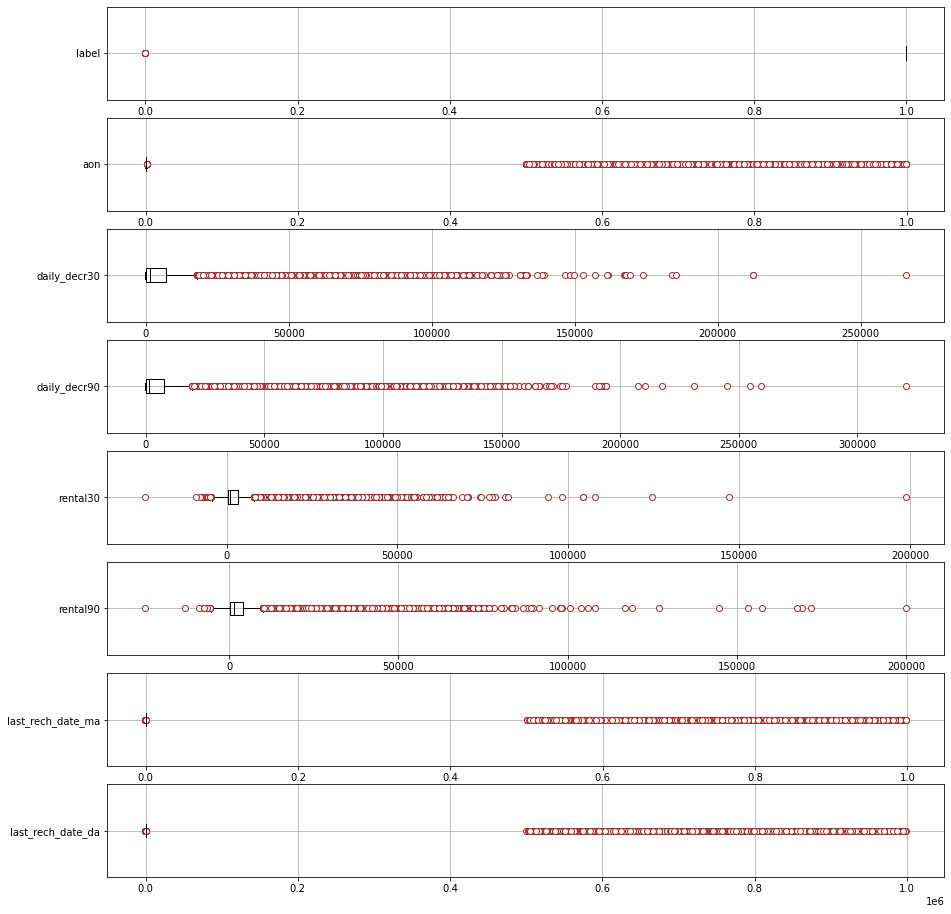

In [263]:
col1=['label','aon','daily_decr30','daily_decr90','rental30','rental90','last_rech_date_ma','last_rech_date_da']      
fig, pltcan=plt.subplots(nrows =len(col1),ncols =1, figsize=(15,16))
red_color=dict(markerfacecolor='white',markeredgecolor='brown',marker='o')
for predcol , i in zip(col1, range(len(col1))):
    df.boxplot(column=predcol, vert=False, ax=pltcan[i], figsize=(15,16),color='black',flierprops=red_color)

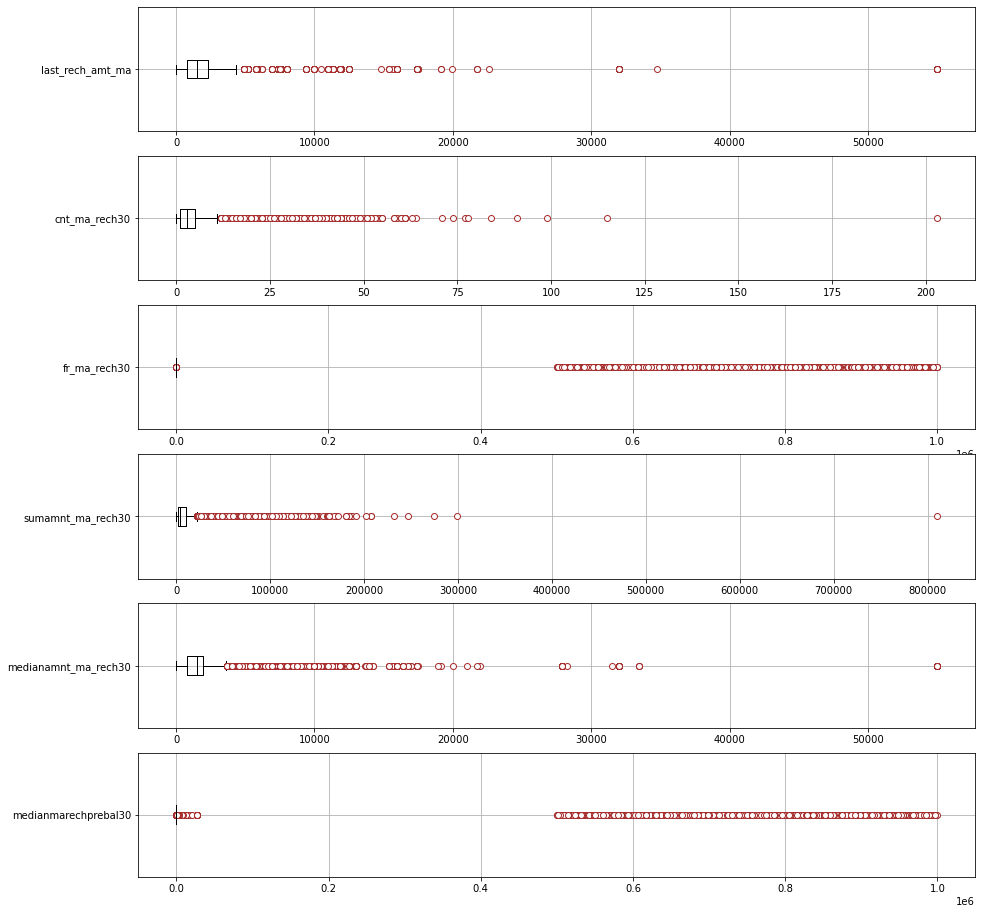

In [264]:
col1=['last_rech_amt_ma','cnt_ma_rech30','fr_ma_rech30','sumamnt_ma_rech30','medianamnt_ma_rech30','medianmarechprebal30']      
fig, pltcan=plt.subplots(nrows =len(col1),ncols =1, figsize=(15,16))
red_color=dict(markerfacecolor='white',markeredgecolor='brown',marker='o')
for predcol , i in zip(col1, range(len(col1))):
    df.boxplot(column=predcol, vert=False, ax=pltcan[i], figsize=(15,16),color='black',flierprops=red_color)

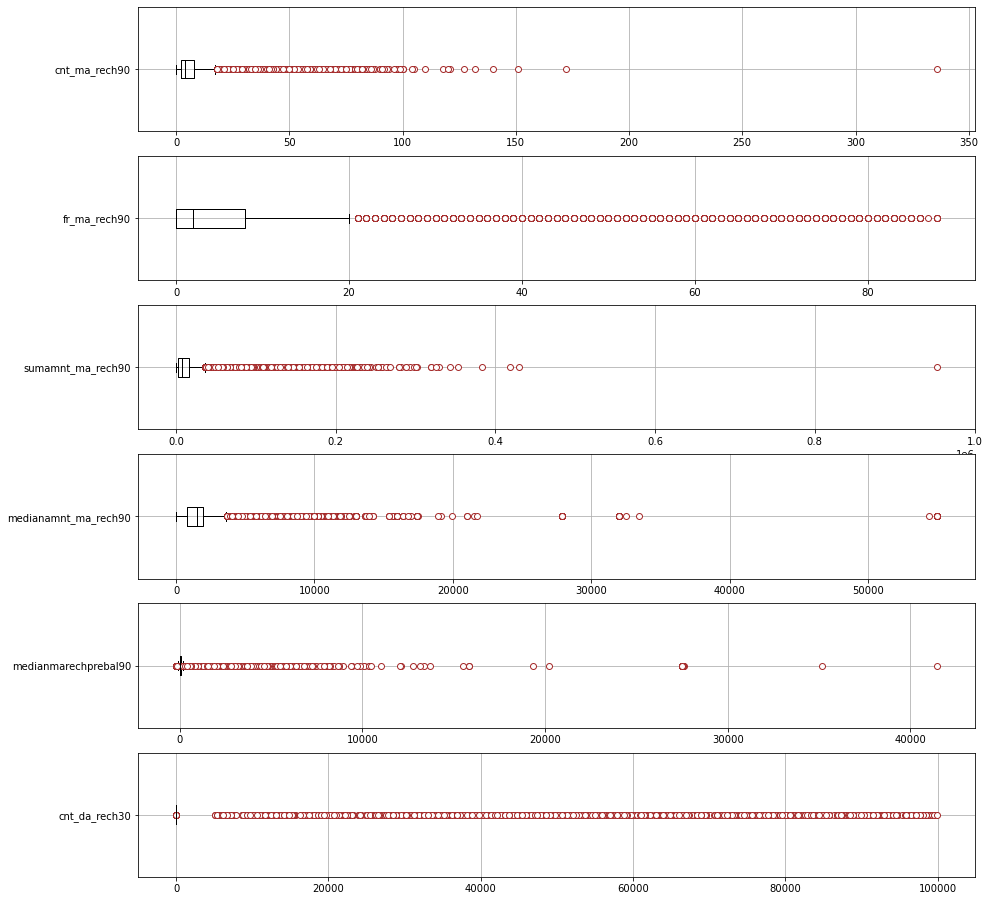

In [265]:
col1=['cnt_ma_rech90','fr_ma_rech90','sumamnt_ma_rech90','medianamnt_ma_rech90','medianmarechprebal90','cnt_da_rech30']      
fig, pltcan=plt.subplots(nrows =len(col1),ncols =1, figsize=(15,16))
red_color=dict(markerfacecolor='white',markeredgecolor='brown',marker='o')
for predcol , i in zip(col1, range(len(col1))):
    df.boxplot(column=predcol, vert=False, ax=pltcan[i], figsize=(15,16),color='black',flierprops=red_color)  

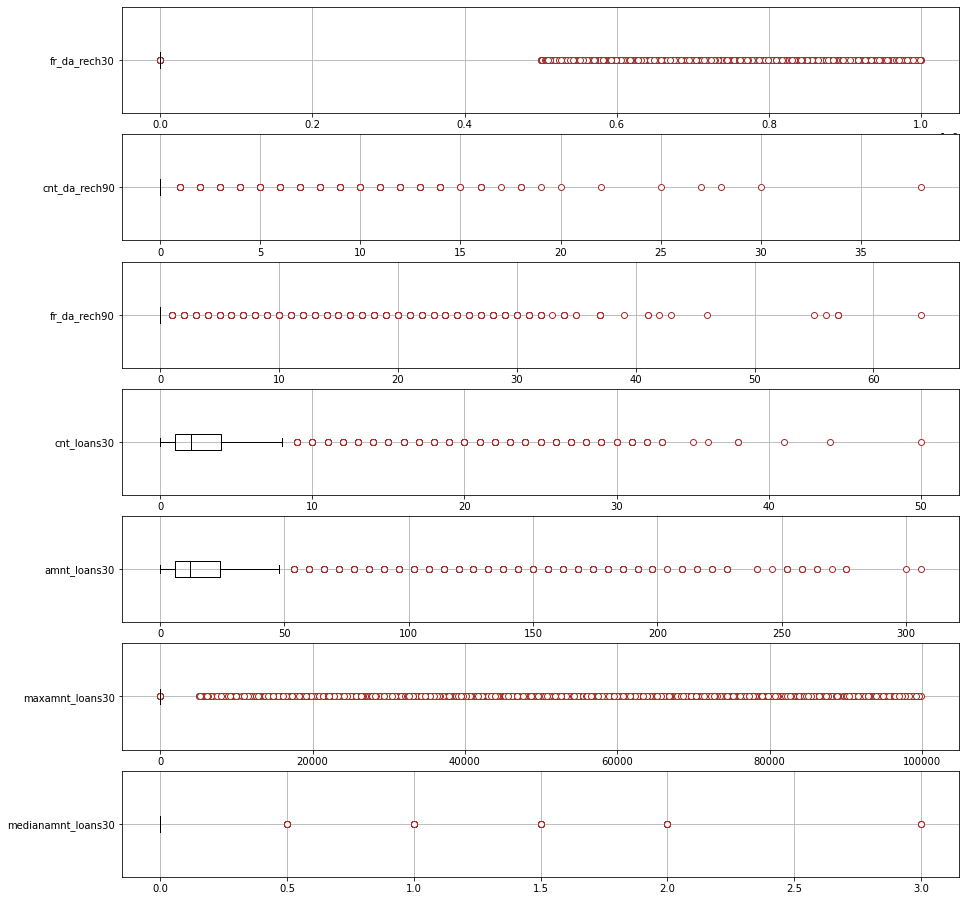

In [266]:
col1=['fr_da_rech30','cnt_da_rech90','fr_da_rech90','cnt_loans30','amnt_loans30','maxamnt_loans30','medianamnt_loans30']      
fig, pltcan=plt.subplots(nrows =len(col1),ncols =1, figsize=(15,16))
red_color=dict(markerfacecolor='white',markeredgecolor='brown',marker='o')
for predcol , i in zip(col1, range(len(col1))):
    df.boxplot(column=predcol, vert=False, ax=pltcan[i], figsize=(15,16),color='black',flierprops=red_color)

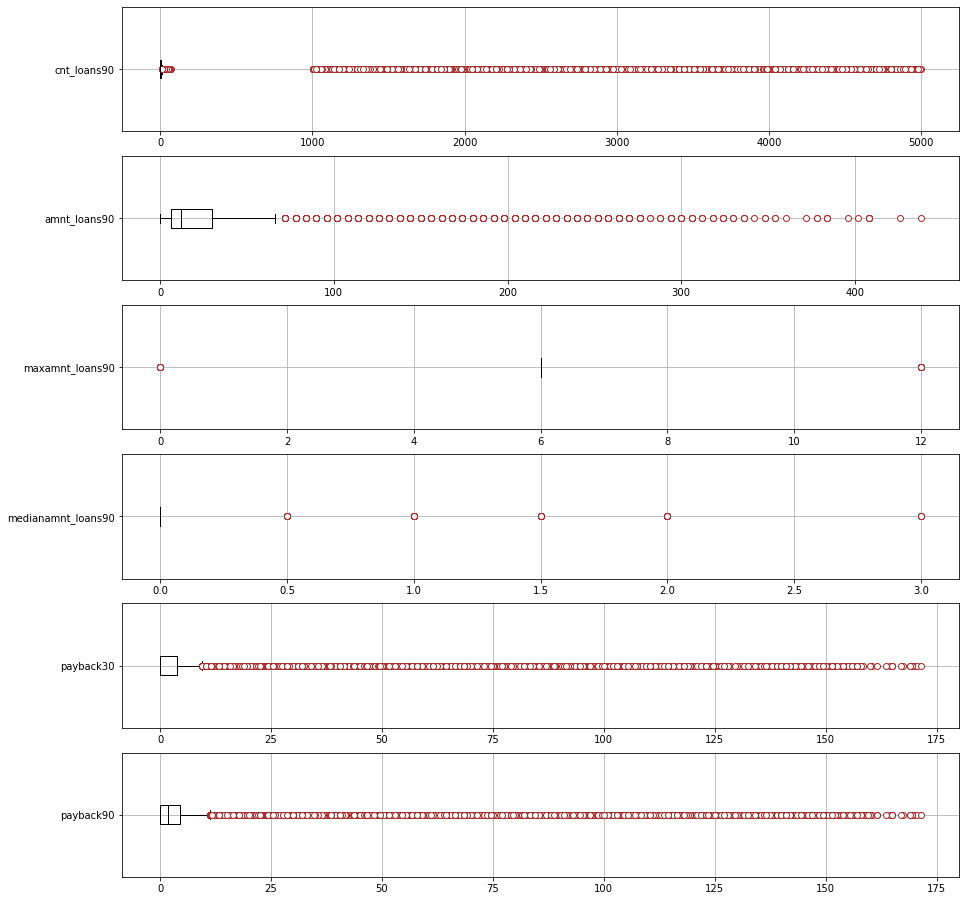

In [267]:
col1=['cnt_loans90','amnt_loans90','maxamnt_loans90','medianamnt_loans90','payback30','payback90']      
fig, pltcan=plt.subplots(nrows =len(col1),ncols =1, figsize=(15,16))
red_color=dict(markerfacecolor='white',markeredgecolor='brown',marker='o')
for predcol , i in zip(col1, range(len(col1))):
    df.boxplot(column=predcol, vert=False, ax=pltcan[i], figsize=(15,16),color='black',flierprops=red_color)    

*Observation :*<br>*All columns have outliers except label, medianamnt_loans30, medianamnt_loans90, maxamnt_loans90 columns*

###### check for skewness

Unnamed: 0               0.000000
label                   -2.270254
aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90  

<AxesSubplot:>

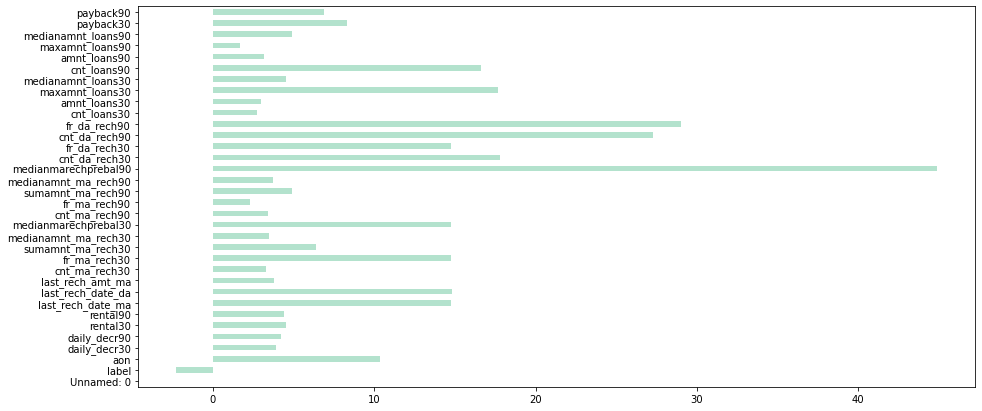

In [268]:
print(df.skew())
df.skew().plot(kind='barh',colormap='Pastel2',figsize=(15,7))

*Observation :*<br>*All Numerical Variables have skewness*

###### Identify Target and Feature Variable

Prediction-predicte about customer is Non- defaulter or defaulter

#Targe Variable(Depaendent Features)- Label

#Predictors(Independent Features)- All variables

###### Univariate Analysis

<AxesSubplot:title={'center':'Label-paid back the credit or Not'}, ylabel='label'>

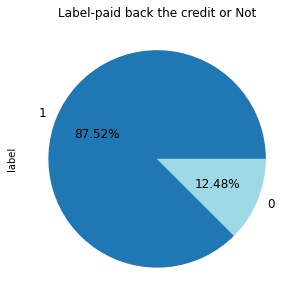

In [269]:
df['label'].value_counts().plot(kind = "pie",autopct='%1.2f%%',fontsize=12,figsize=(5,5),colormap='tab20',title='Label-paid back the credit or Not')

*Observation :*<br>*87% user successfully paid back amout within 5 day of loan deposit time limit*
<br>*12% user failed to paid back amout within 5 day of loan deposit time limit*

Text(0.5, 1.0, 'mobile number of user')

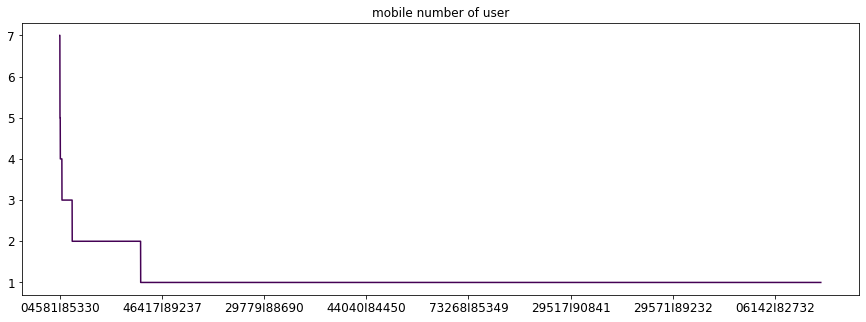

In [270]:
df['msisdn'].value_counts().plot(kind = "line",fontsize=12,figsize=(15,5),cmap='viridis')
plt.title('mobile number of user')

*Observation*<br>*max on o4581I85330 mobile number*

<AxesSubplot:title={'center':'age on cellular network in days'}>

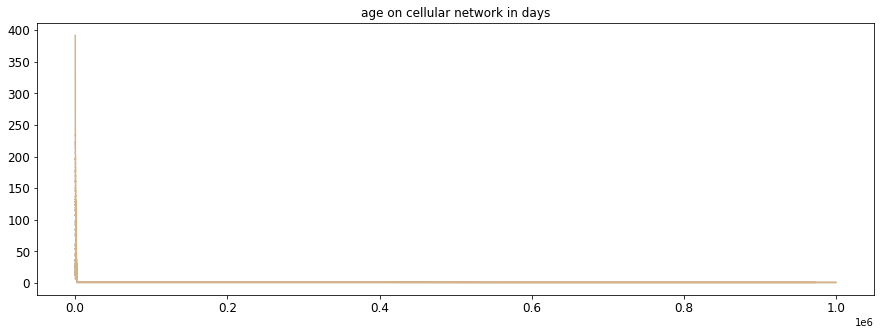

In [271]:
df['aon'].value_counts().plot(kind = "line",fontsize=12,figsize=(15,5),color='tan',title='age on cellular network in days')

*Observation*<br>*age on cellular network is max on 0*

Text(0.5, 1.0, 'Daily amount spent from main account in 90 days')

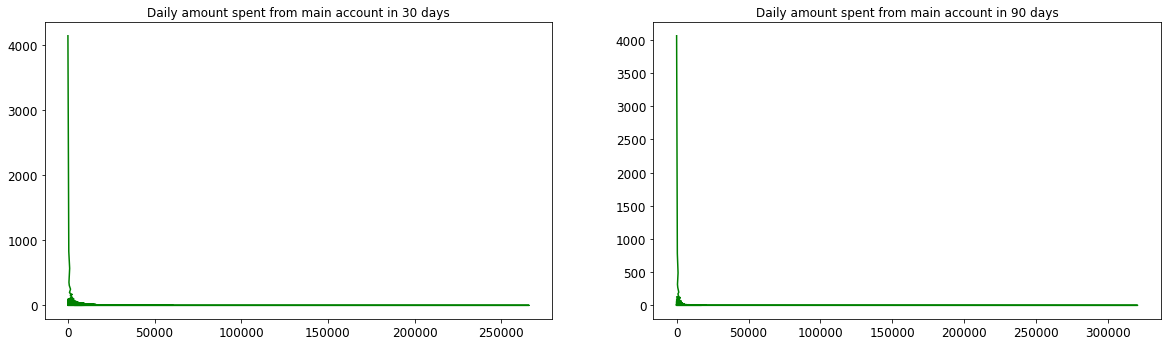

In [272]:
plt.subplot(221)
df['daily_decr30'].value_counts().plot(kind = "line",fontsize=12,figsize=(20,12),color='green')
plt.title('Daily amount spent from main account in 30 days')
plt.subplot(222)
df['daily_decr90'].value_counts().plot(kind = "line",fontsize=12,figsize=(20,12),color='green')
plt.title('Daily amount spent from main account in 90 days')

*Observation*<br>*Daily amount spent from main account is max at 0 to 10000*

Text(0.5, 1.0, 'Average main account balance over last 90 days')

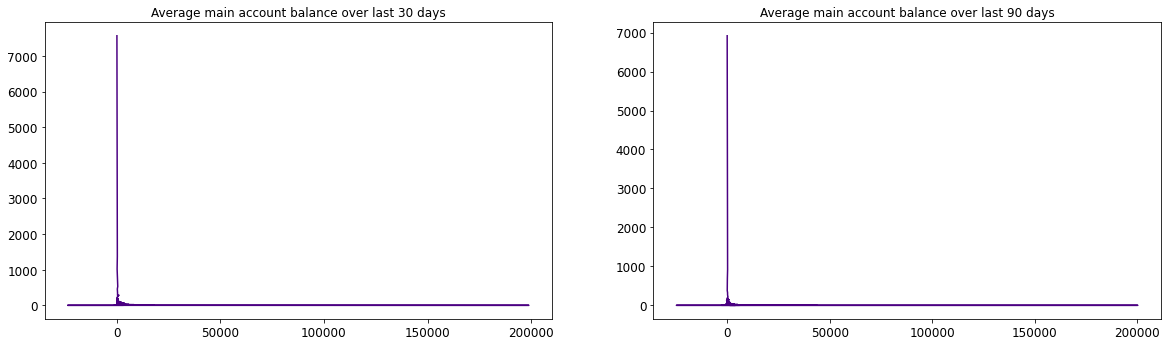

In [273]:
plt.subplot(221)
df['rental30'].value_counts().plot(kind = "line",fontsize=12,figsize=(20,12),color='indigo')
plt.title('Average main account balance over last 30 days')
plt.subplot(222)
df['rental90'].value_counts().plot(kind = "line",fontsize=12,figsize=(20,12),color='indigo')
plt.title('Average main account balance over last 90 days')

Text(0.5, 1.0, 'Amount of last recharge of main account')

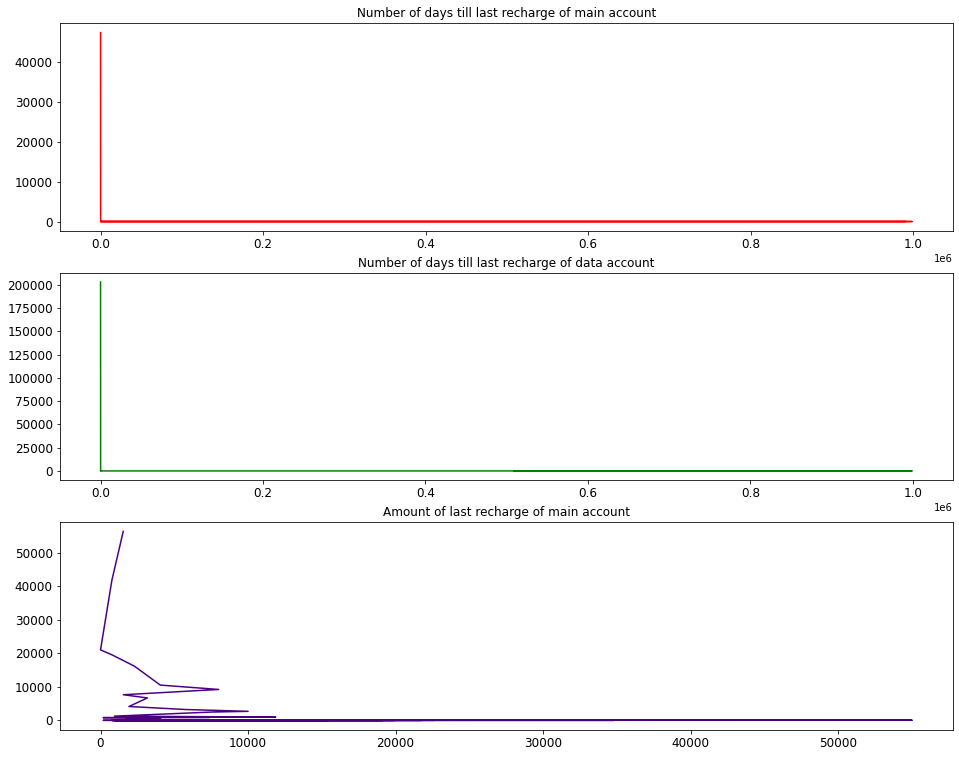

In [274]:
plt.subplot(311)
df['last_rech_date_ma'].value_counts().plot(kind = "line",fontsize=12,figsize=(16,13),color='red')
plt.title('Number of days till last recharge of main account')
plt.subplot(312)
df['last_rech_date_da'].value_counts().plot(kind = "line",fontsize=12,figsize=(16,13),color='green')
plt.title('Number of days till last recharge of data account')
plt.subplot(313)
df['last_rech_amt_ma'].value_counts().plot(kind = "line",fontsize=12,figsize=(16,13),color='indigo')
plt.title('Amount of last recharge of main account')

Text(0.5, 1.0, 'Frequency of main account recharged in last 90 days')

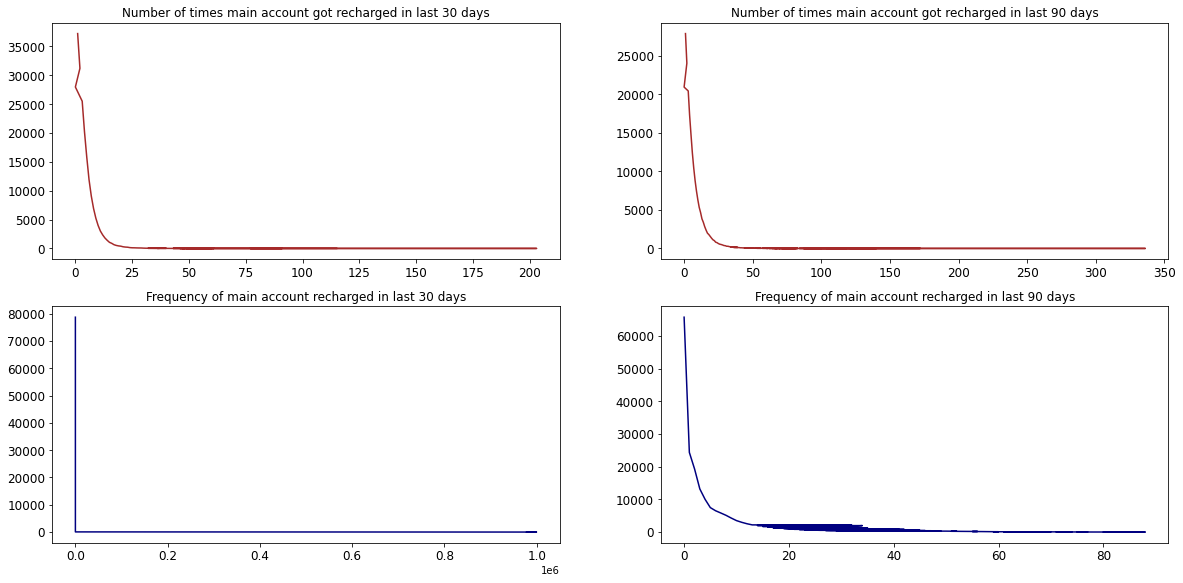

In [275]:
plt.subplot(421)
df['cnt_ma_rech30'].value_counts().plot(kind = "line",fontsize=12,figsize=(20,20),color='brown')
plt.title('Number of times main account got recharged in last 30 days')
plt.subplot(422)
df['cnt_ma_rech90'].value_counts().plot(kind = "line",fontsize=12,figsize=(20,20),color='brown')
plt.title('Number of times main account got recharged in last 90 days')

plt.subplot(423)
df['fr_ma_rech30'].value_counts().plot(kind = "line",fontsize=12,figsize=(20,20),color='navy')
plt.title('Frequency of main account recharged in last 30 days')
plt.subplot(424)
df['fr_ma_rech90'].value_counts().plot(kind = "line",fontsize=12,figsize=(20,20),color='navy')
plt.title('Frequency of main account recharged in last 90 days')

Text(0.5, 1.0, 'Median of main account balance just before recharge in last 90 days at user level')

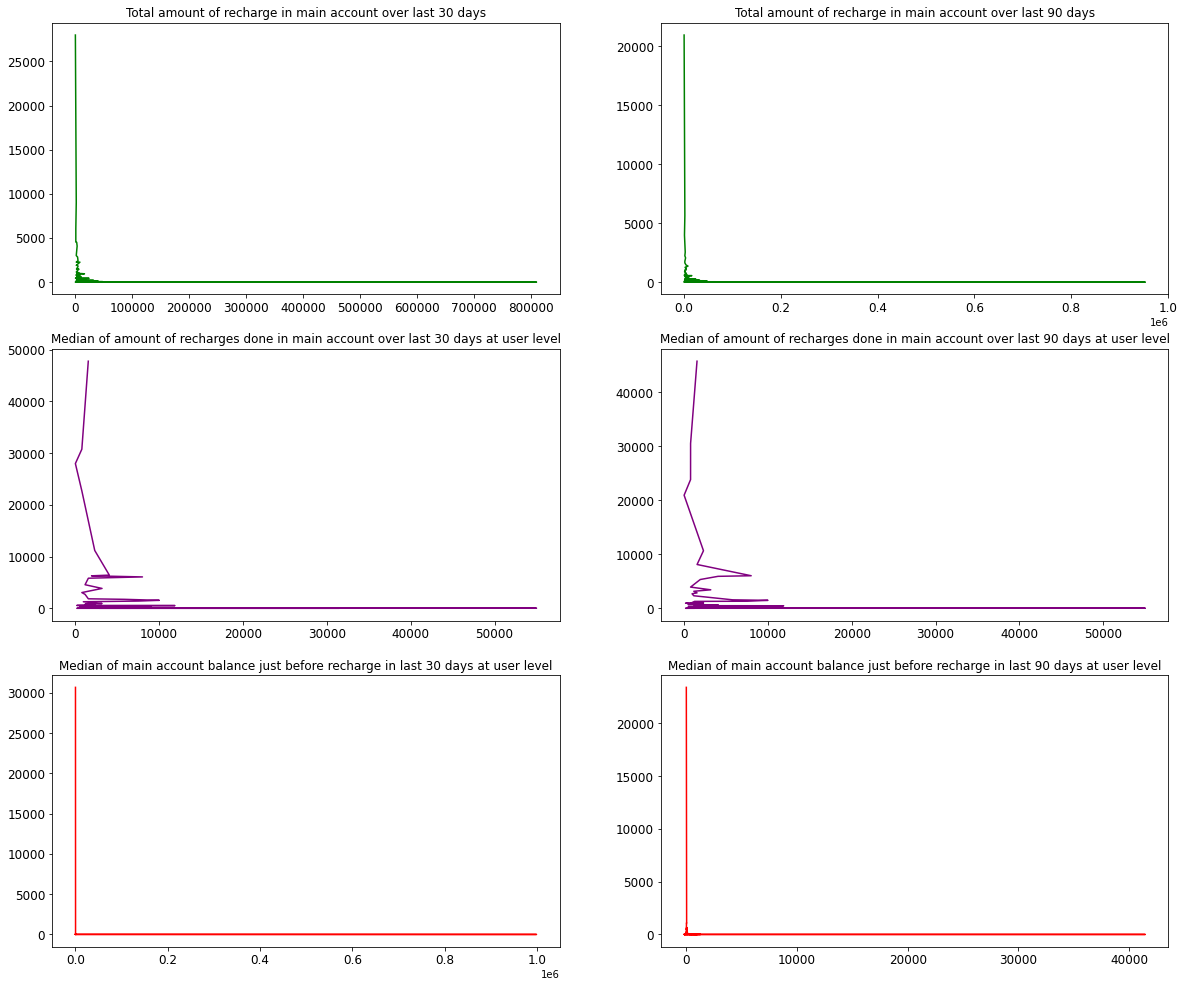

In [276]:
plt.subplot(621)
df['sumamnt_ma_rech30'].value_counts().plot(kind = "line",fontsize=12,figsize=(20,35),color='green')
plt.title('Total amount of recharge in main account over last 30 days')
plt.subplot(622)
df['sumamnt_ma_rech90'].value_counts().plot(kind = "line",fontsize=12,figsize=(20,35),color='green')
plt.title('Total amount of recharge in main account over last 90 days')

plt.subplot(623)
df['medianamnt_ma_rech30'].value_counts().plot(kind = "line",fontsize=12,figsize=(20,35),color='purple')
plt.title('Median of amount of recharges done in main account over last 30 days at user level')
plt.subplot(624)
df['medianamnt_ma_rech90'].value_counts().plot(kind = "line",fontsize=12,figsize=(20,35),color='purple')
plt.title('Median of amount of recharges done in main account over last 90 days at user level')

plt.subplot(625)
df['medianmarechprebal30'].value_counts().plot(kind = "line",fontsize=12,figsize=(20,35),color='red')
plt.title('Median of main account balance just before recharge in last 30 days at user level')
plt.subplot(626)
df['medianmarechprebal90'].value_counts().plot(kind = "line",fontsize=12,figsize=(20,35),color='red')
plt.title('Median of main account balance just before recharge in last 90 days at user level')

Text(0.5, 1.0, 'Frequency of data account recharged in last 90 days')

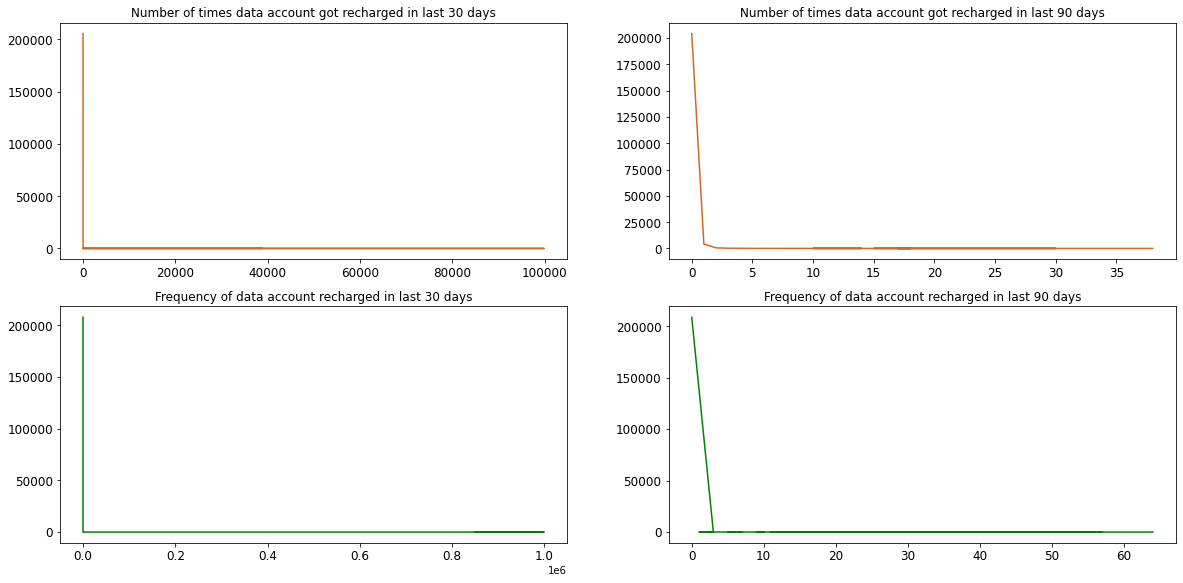

In [277]:
plt.subplot(421)
df['cnt_da_rech30'].value_counts().plot(kind = "line",fontsize=12,figsize=(20,20),color='chocolate')
plt.title('Number of times data account got recharged in last 30 days')
plt.subplot(422)
df['cnt_da_rech90'].value_counts().plot(kind = "line",fontsize=12,figsize=(20,20),color='chocolate')
plt.title('Number of times data account got recharged in last 90 days')

plt.subplot(423)
df['fr_da_rech30'].value_counts().plot(kind = "line",fontsize=12,figsize=(20,20),color='green')
plt.title('Frequency of data account recharged in last 30 days')
plt.subplot(424)
df['fr_da_rech90'].value_counts().plot(kind = "line",fontsize=12,figsize=(20,20),color='green')
plt.title('Frequency of data account recharged in last 90 days')

Text(0.5, 1.0, 'Median of amounts of loan taken by the user in last 90 days')

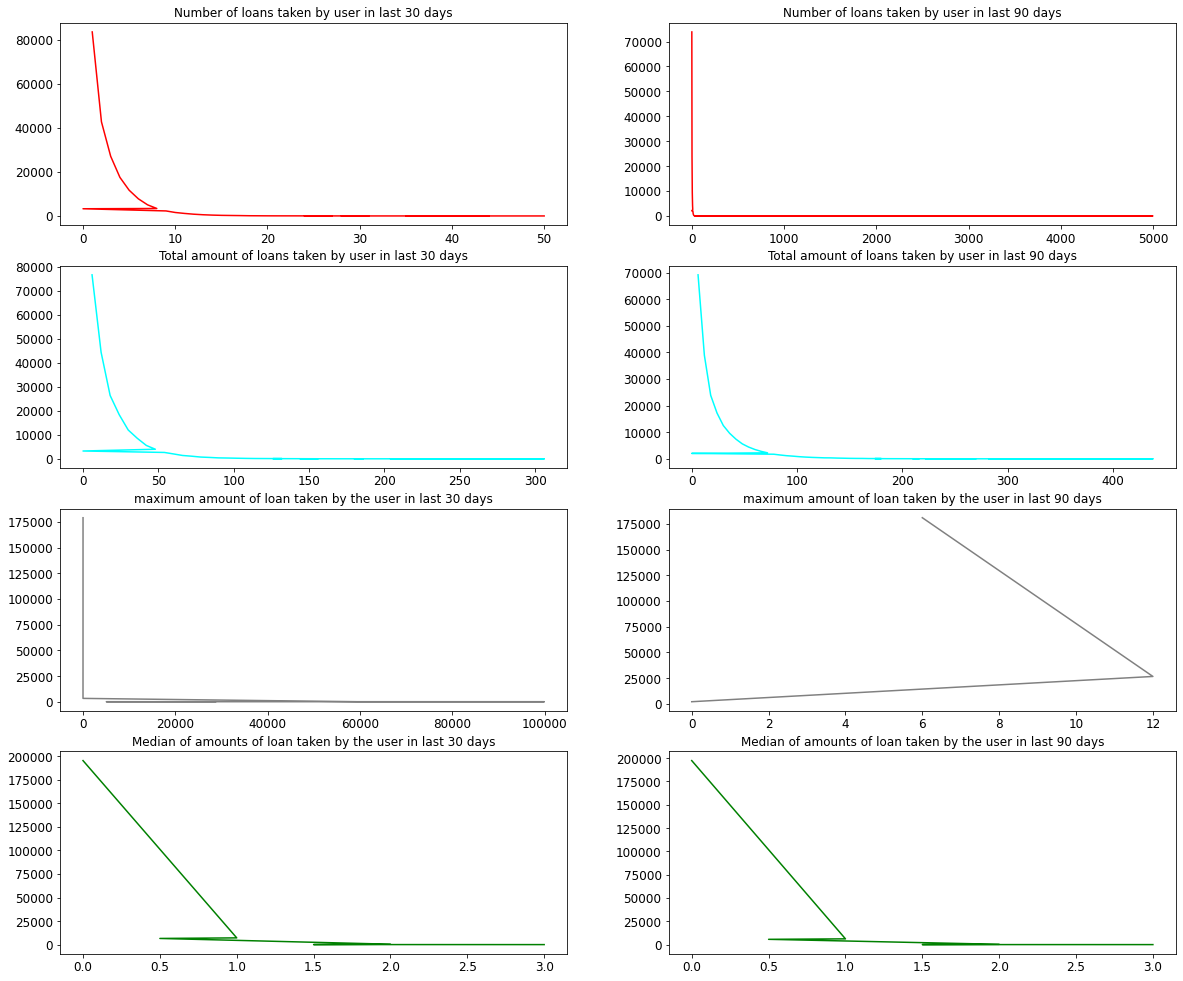

In [278]:
plt.subplot(821)
df['cnt_loans30'].value_counts().plot(kind = "line",fontsize=12,figsize=(20,35),color='red')
plt.title('Number of loans taken by user in last 30 days')
plt.subplot(822)
df['cnt_loans90'].value_counts().plot(kind = "line",fontsize=12,figsize=(20,35),color='red')
plt.title('Number of loans taken by user in last 90 days')

plt.subplot(823)
df['amnt_loans30'].value_counts().plot(kind = "line",fontsize=12,figsize=(20,35),color='aqua')
plt.title('Total amount of loans taken by user in last 30 days')
plt.subplot(824)
df['amnt_loans90'].value_counts().plot(kind = "line",fontsize=12,figsize=(20,35),color='aqua')
plt.title('Total amount of loans taken by user in last 90 days')

plt.subplot(825)
df['maxamnt_loans30'].value_counts().plot(kind = "line",fontsize=12,figsize=(20,35),color='grey')
plt.title('maximum amount of loan taken by the user in last 30 days')
plt.subplot(826)
df['maxamnt_loans90'].value_counts().plot(kind = "line",fontsize=12,figsize=(20,35),color='grey')
plt.title('maximum amount of loan taken by the user in last 90 days')

plt.subplot(827)
df['medianamnt_loans30'].value_counts().plot(kind = "line",fontsize=12,figsize=(20,35),color='green')
plt.title('Median of amounts of loan taken by the user in last 30 days')
plt.subplot(828)
df['medianamnt_loans90'].value_counts().plot(kind = "line",fontsize=12,figsize=(20,35),color='green')
plt.title('Median of amounts of loan taken by the user in last 90 days')

Text(0.5, 1.0, 'Average payback time in days over last 90 days')

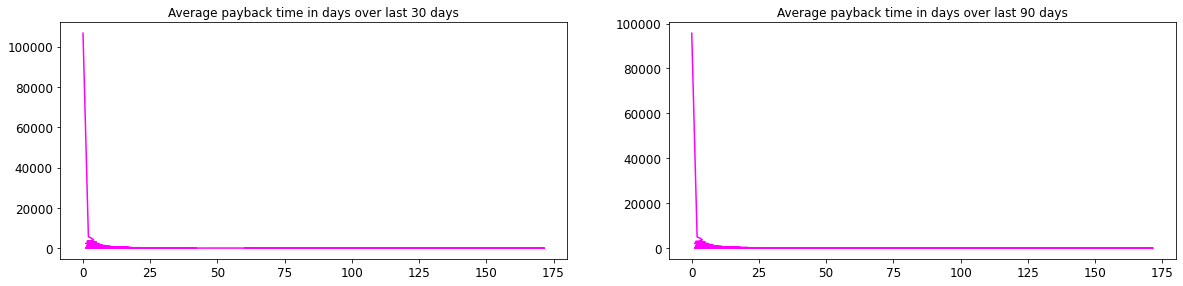

In [279]:
plt.subplot(421)
df['payback30'].value_counts().plot(kind = "line",fontsize=12,figsize=(20,20),color='magenta')
plt.title('Average payback time in days over last 30 days')
plt.subplot(422)
df['payback90'].value_counts().plot(kind = "line",fontsize=12,figsize=(20,20),color='magenta')
plt.title('Average payback time in days over last 90 days')

Text(0.5, 1.0, 'telecom circle')

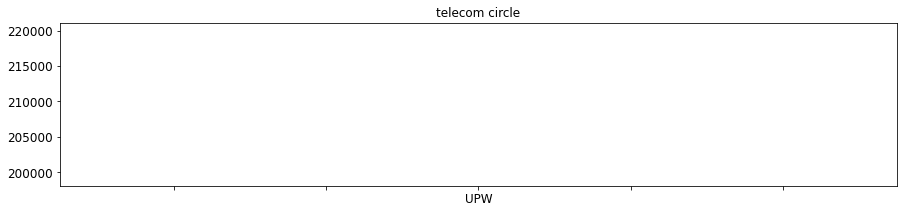

In [280]:
df['pcircle'].value_counts().plot(kind = "line",fontsize=12,figsize=(15,3),color='red')
plt.title('telecom circle')

Text(0.5, 1.0, 'Date')

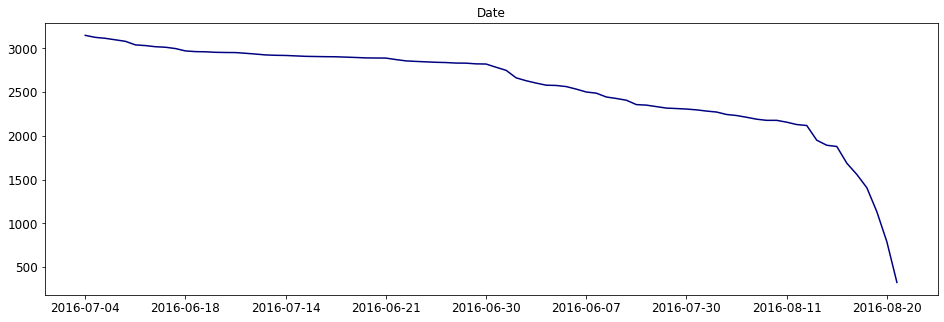

In [281]:
df['pdate'].value_counts().plot(kind = "line",fontsize=12,figsize=(16,5),color='navy')
plt.title('Date')

###### Bivariate Analysis

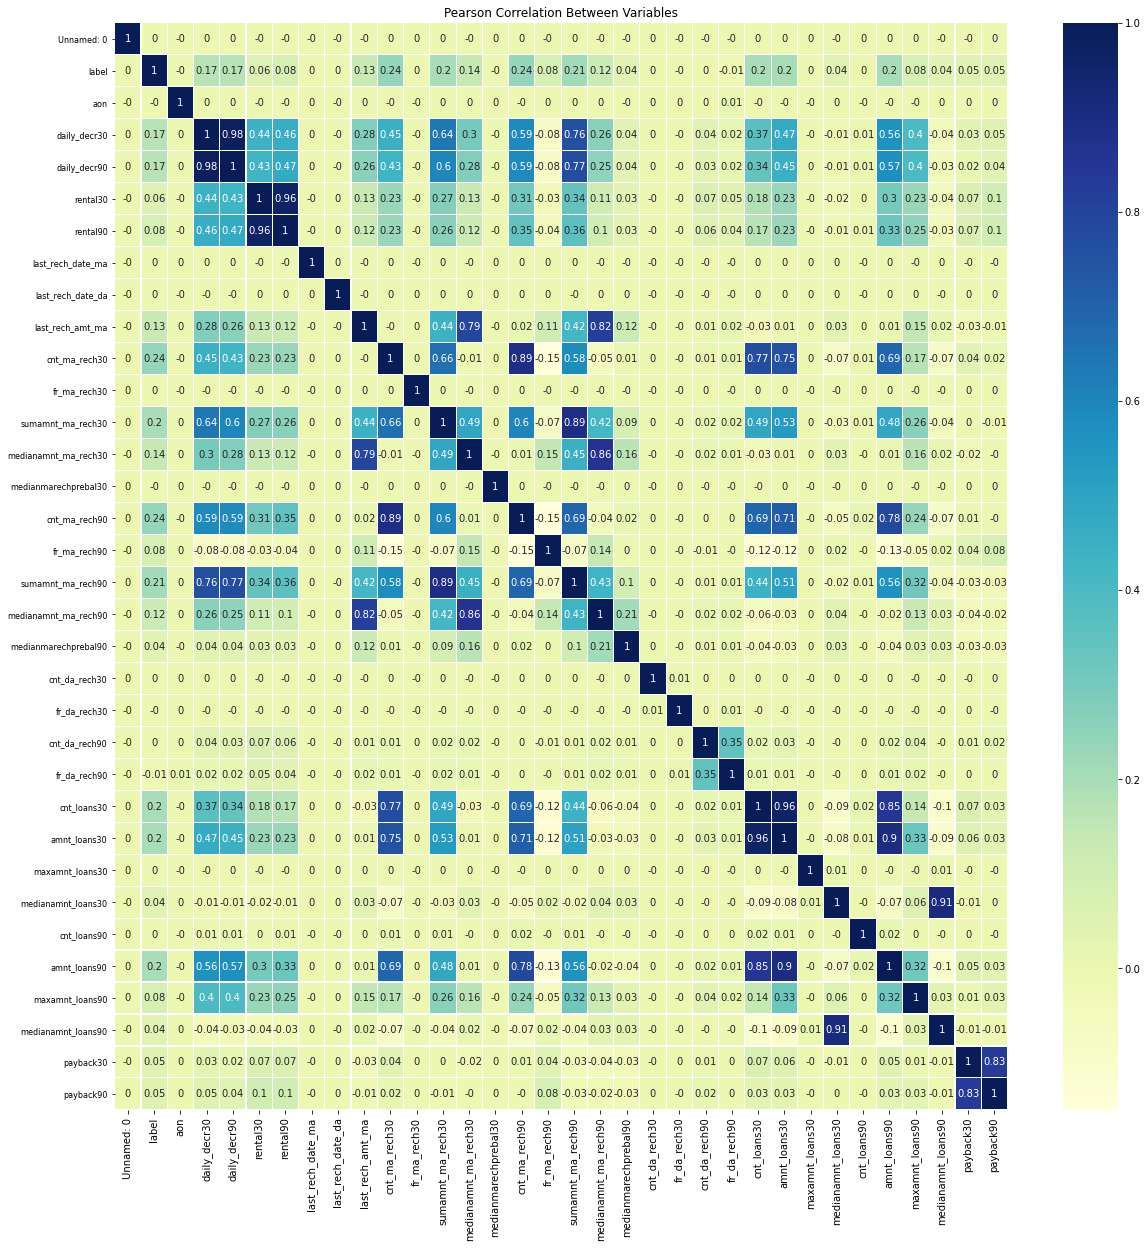

In [282]:
pcorrel = df.corr(method='pearson').round(2)
plt.figure(figsize=(20,20)) 
sns.heatmap(pcorrel,xticklabels=pcorrel.columns,yticklabels=pcorrel.columns,cmap="YlGnBu",annot=True,linewidth=0.1)
plt.title("Pearson Correlation Between Variables")
plt.xticks(fontsize=10)
plt.yticks(fontsize=8)
plt.show()   

###### Handling Outliers

In [283]:
fout =['aon','daily_decr30','daily_decr90','rental30','rental90','last_rech_amt_ma','cnt_ma_rech30','last_rech_date_ma',
       'fr_ma_rech30','sumamnt_ma_rech30','medianamnt_ma_rech30','medianmarechprebal30','cnt_ma_rech90','fr_ma_rech90',
       'sumamnt_ma_rech90','medianamnt_ma_rech90','medianmarechprebal90','cnt_loans30','amnt_loans30','cnt_loans90',
       'amnt_loans90','payback30','payback90']
for f in fout:
    q1 = df[f].quantile(0.25)
    q3 = df[f].quantile(0.75)
    IQR = q3-q1
    lolimit = q1 - (IQR*1.5)
    uplimit = q3 + (IQR*1.5)
    df.loc[df[f]<lolimit,f] = lolimit
    df.loc[df[f]>uplimit,f] = uplimit

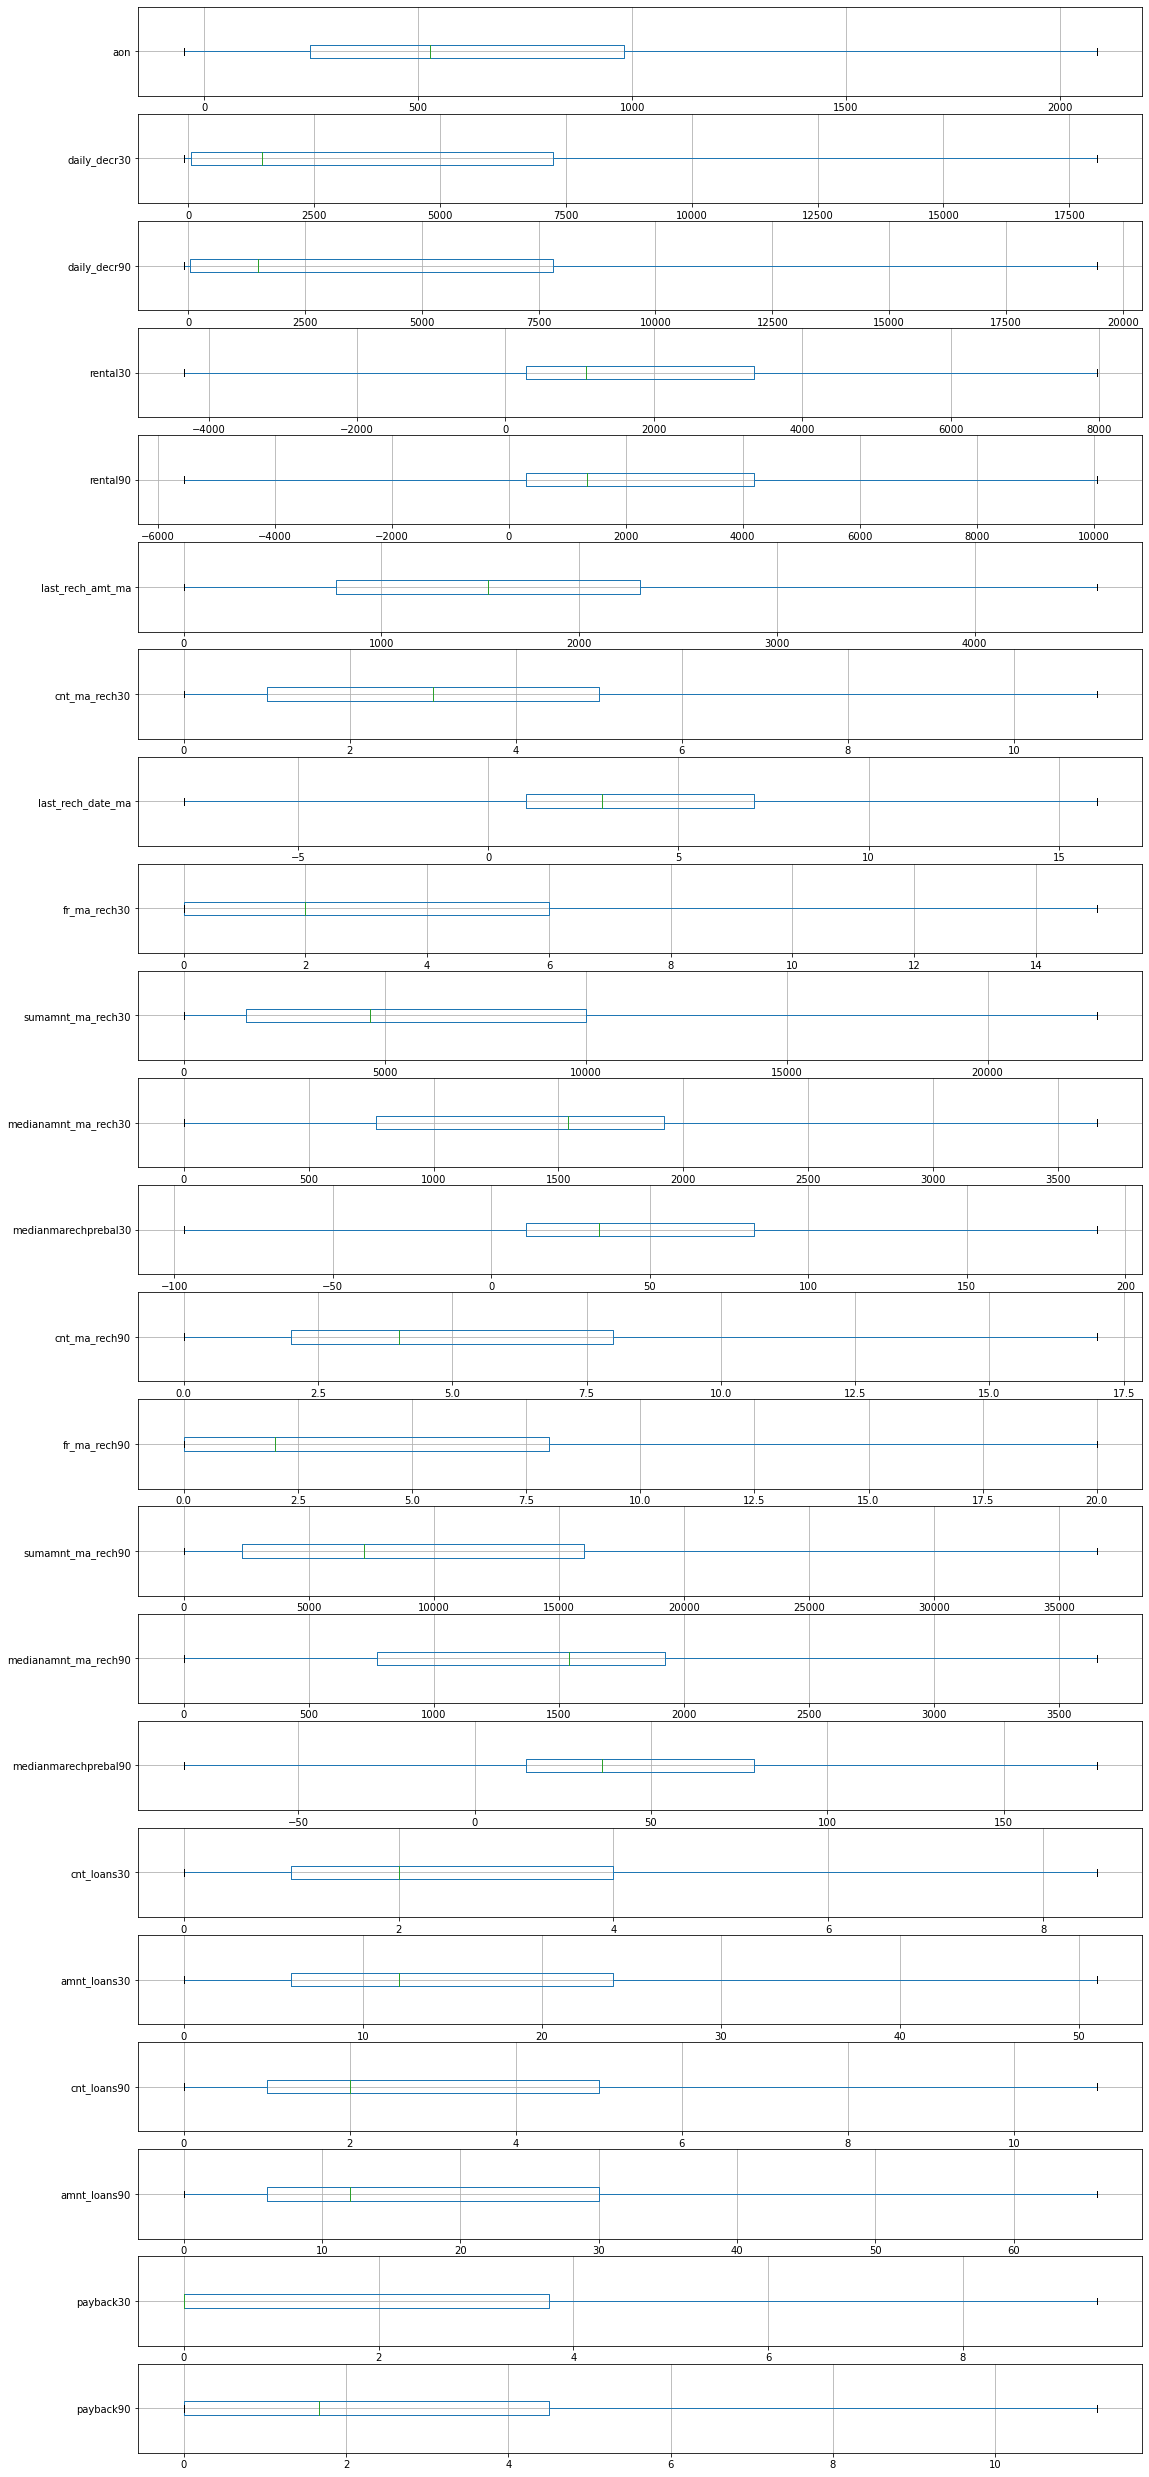

In [284]:
fig, pltcan=plt.subplots(nrows=len(fout), ncols=1, figsize=(18,45))
for predcol , i in zip(fout, range(len(fout))):
    df.boxplot(column=predcol, figsize=(2,10), vert=False, ax=pltcan[i])

In [285]:
#df['cnt_da_rech30']=df['cnt_da_rech30'].ewm(alpha=0.99).mean()


In [286]:
#cout=['cnt_da_rech30','fr_da_rech30','cnt_da_rech90','fr_da_rech90','maxamnt_loans30']
#fig, pltcan=plt.subplots(nrows=len(cout), ncols=1, figsize=(18,11))
#for predcol , i in zip(cout, range(len(cout))):
#    df.boxplot(column=predcol, figsize=(2,10), vert=False, ax=pltcan[i])

###### Handling Zeros

In [287]:
df.drop(['last_rech_date_da','cnt_da_rech30','fr_da_rech30','cnt_da_rech90','fr_da_rech90','medianamnt_loans30','medianamnt_loans90'],inplace=True,axis=1)

In [288]:
print("Total % of Zeros as Value in Columns")
df[df==0].count()/df.shape[0]*100   

Total % of Zeros as Value in Columns


Unnamed: 0               0.000000
label                   12.482287
msisdn                   0.000000
aon                      0.000000
daily_decr30             1.977165
daily_decr90             1.938519
rental30                 3.609853
rental90                 3.300683
last_rech_date_ma        9.896800
last_rech_amt_ma        10.017033
cnt_ma_rech30           13.349205
fr_ma_rech30            37.540853
sumamnt_ma_rech30       13.349205
medianamnt_ma_rech30    13.349205
medianmarechprebal30    14.637893
cnt_ma_rech90            9.995563
fr_ma_rech90            31.371754
sumamnt_ma_rech90        9.995563
medianamnt_ma_rech90     9.995563
medianmarechprebal90    11.160201
cnt_loans30              1.554918
amnt_loans30             1.554918
maxamnt_loans30          1.547762
cnt_loans90              0.971406
amnt_loans90             0.974746
maxamnt_loans90          0.974746
payback30               50.913914
payback90               45.659445
pcircle                  0.000000
pdate         

In [289]:
df['daily_decr30'].replace(0,np.nan,inplace=True)
df['daily_decr30'].fillna(1597.793, inplace=True)
df['daily_decr90'].replace(0,np.nan,inplace=True)
df['daily_decr90'].fillna(1500.0, inplace=True)
df['rental30'].replace(0,np.nan,inplace=True)
df['rental30'].fillna(1083.57, inplace=True)
df['rental90'].replace(0,np.nan,inplace=True)
df['rental90'].fillna(1334.0, inplace=True)

df['sumamnt_ma_rech30'].replace(0,np.nan,inplace=True)
df['sumamnt_ma_rech30'].fillna(4628.0, inplace=True)
df['medianamnt_ma_rech30'].replace(0,np.nan,inplace=True)
df['medianamnt_ma_rech30'].fillna(1539.0, inplace=True)
df['medianmarechprebal30'].replace(0,np.nan,inplace=True)
df['medianmarechprebal30'].fillna(33.9000000000001, inplace=True)


df['sumamnt_ma_rech30'].replace(0,np.nan,inplace=True)
df['sumamnt_ma_rech30'].fillna(7226.0, inplace=True)
df['medianamnt_ma_rech90'].replace(0,np.nan,inplace=True)
df['medianamnt_ma_rech90'].fillna(1539.0, inplace=True)
df['medianmarechprebal90'].replace(0,np.nan,inplace=True)
df['medianmarechprebal90'].fillna(36.0, inplace=True)

df['maxamnt_loans30'].replace(0,np.nan,inplace=True)
df['maxamnt_loans30'].fillna(6.0, inplace=True)
df['maxamnt_loans90'].replace(0,np.nan,inplace=True)
df['maxamnt_loans90'].fillna(6.0, inplace=True)


df['maxamnt_loans30'].replace(0,np.nan,inplace=True)
df['maxamnt_loans30'].fillna(2.299, inplace=True)
df['maxamnt_loans90'].replace(0,np.nan,inplace=True)
df['maxamnt_loans90'].fillna(2.894, inplace=True)


###### Encoding variable

In [290]:
df['pdate'] = pd.to_datetime(df['pdate'])
df['Year'] = df['pdate'].dt.year
df['Month'] = df['pdate'].dt.month
df['Day'] = df['pdate'].dt.day
df.drop('pdate', axis=1, inplace = True)

In [291]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['pcircle']=le.fit_transform(df['pcircle'])

In [292]:
df[["msisdn1", "msisdn2"]] = df["msisdn"].str.split("I", expand=True)
df["msisdn1"]= df["msisdn1"].astype(int)
df["msisdn2"]= df["msisdn2"].astype(int)
df.drop(['msisdn'],inplace=True,axis=1)

In [293]:
df.head()

Unnamed: 0  label    aon  daily_decr30  daily_decr90  rental30  rental90  \
0           1      0  272.0   3055.050000   3065.150000    220.13    260.13   
1           2      1  712.0  12122.000000  12124.750000   3691.26   3691.26   
2           3      1  535.0   1398.000000   1398.000000    900.13    900.13   
3           4      1  241.0     21.228000     21.228000    159.42    159.42   
4           5      1  947.0    150.619333    150.619333   1098.90   1098.90   

   last_rech_date_ma  last_rech_amt_ma  cnt_ma_rech30  fr_ma_rech30  \
0                2.0            1539.0            2.0          15.0   
1               16.0            4617.5            1.0           0.0   
2                3.0            1539.0            1.0           0.0   
3               16.0             947.0            0.0           0.0   
4                4.0            2309.0            7.0           2.0   

   sumamnt_ma_rech30  medianamnt_ma_rech30  medianmarechprebal30  \
0             3078.0                1539.0                  7.50   
1             5787.0                3655.0                 61.04   
2             1539.0                1539.0                 66.32   
3             4628.0                1539.0                 33.90   
4            20029.0                2309.0                 29.00   

   cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  medianamnt_ma_rech90  \
0            2.0          20.0             3078.0                1539.0   
1            1.0           0.0             5787.0                3650.5   
2            1.0           0.0             1539.0                1539.0   
3            1.0           0.0              947.0                 947.0   
4            8.0           2.0            23496.0                2888.0   

   medianmarechprebal90  cnt_loans30  amnt_loans30  maxamnt_loans30  \
0                  7.50          2.0          12.0              6.0   
1                 61.04          1.0          12.0             12.0   
2                 66.32          1.0           6.0              6.0   
3                  2.50          2.0          12.0              6.0   
4                 35.00          7.0          42.0              6.0   

   cnt_loans90  amnt_loans90  maxamnt_loans90  payback30  payback90  pcircle  \
0          2.0          12.0              6.0   9.375000  11.250000        0   
1          1.0          12.0             12.0   0.000000   0.000000        0   
2          1.0           6.0              6.0   0.000000   0.000000        0   
3          2.0          12.0              6.0   0.000000   0.000000        0   
4          7.0          42.0              6.0   2.333333   2.333333        0   

   Year  Month  Day  msisdn1  msisdn2  
0  2016      7   20    21408    70789  
1  2016      8   10    76462    70374  
2  2016      8   19    17943    70372  
3  2016      6    6    55773    70781  
4  2016      6   22     3813    82730

###### Handling Skewness

In [294]:
df[['label','aon','daily_decr30','daily_decr90','rental30','rental90','last_rech_date_ma','last_rech_amt_ma',
    'cnt_ma_rech30','fr_ma_rech30','sumamnt_ma_rech30','cnt_ma_rech90','fr_ma_rech90','sumamnt_ma_rech90',
    'medianamnt_ma_rech90','medianmarechprebal90','cnt_loans30','amnt_loans30','maxamnt_loans30',
    'cnt_loans90','amnt_loans90','maxamnt_loans90','payback30','payback90','msisdn2']]=np.cbrt(df[['label',
    'aon','daily_decr30','daily_decr90','rental30','rental90','last_rech_date_ma','last_rech_amt_ma',
    'cnt_ma_rech30','fr_ma_rech30','sumamnt_ma_rech30','cnt_ma_rech90','fr_ma_rech90','sumamnt_ma_rech90',
    'medianamnt_ma_rech90','medianmarechprebal90','cnt_loans30','amnt_loans30','maxamnt_loans30',
    'cnt_loans90','amnt_loans90','maxamnt_loans90','payback30','payback90','msisdn2']])

In [295]:
df.skew()

Unnamed: 0               0.000000
label                   -2.270254
aon                     -0.514603
daily_decr30             0.251574
daily_decr90             0.278873
rental30                -0.443891
rental90                -0.385141
last_rech_date_ma       -0.857197
last_rech_amt_ma        -1.120684
cnt_ma_rech30           -0.827305
fr_ma_rech30             0.015890
sumamnt_ma_rech30        0.303067
medianamnt_ma_rech30     1.083533
medianmarechprebal30     1.039350
cnt_ma_rech90           -0.695399
fr_ma_rech90            -0.004877
sumamnt_ma_rech90       -0.440557
medianamnt_ma_rech90     0.447913
medianmarechprebal90    -1.421156
cnt_loans30             -0.078127
amnt_loans30            -0.111523
maxamnt_loans30         14.795803
cnt_loans90              0.288272
amnt_loans90             0.241363
maxamnt_loans90          2.241299
payback30                0.260515
payback90                0.109398
pcircle                  0.000000
Year                     0.000000
Month         

###### split target and feature variables

In [296]:
y_train=df[['label']]
X_train=df.drop(['label'],axis=1)

print("y_train :",y_train.shape)
print("X_train :",X_train.shape)

y_train : (209593, 1)
X_train : (209593, 32)


###### Feature Selection

In [297]:
cor = df.corr()
ctarget = abs(cor['label'])
rfeatature = ctarget[ctarget>.2]
result1=rfeatature.keys().to_list()
print('strong correlated :',result1)

rfeatature = ctarget[ctarget<0.2]
result2=rfeatature.keys().to_list()
print('\nweak correlated :',result2)

strong correlated : ['label', 'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30', 'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90', 'cnt_loans30', 'amnt_loans30', 'cnt_loans90', 'amnt_loans90', 'payback30', 'payback90']

weak correlated : ['Unnamed: 0', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_date_ma', 'medianamnt_ma_rech30', 'medianmarechprebal30', 'medianamnt_ma_rech90', 'medianmarechprebal90', 'maxamnt_loans30', 'maxamnt_loans90', 'Month', 'Day', 'msisdn1', 'msisdn2']


[0.03890715 0.04130742 0.09380173 0.09316755 0.04772043 0.05102367
 0.02976724 0.03165439 0.03700093 0.0209737  0.02382664 0.01585063
 0.02931894 0.03555739 0.03016695 0.04770613 0.01689986 0.02958432
 0.00997009 0.01368352 0.00244302 0.01222702 0.01129408 0.00556842
 0.01540836 0.01788321 0.         0.         0.0605292  0.05963207
 0.03875624 0.0383697 ]


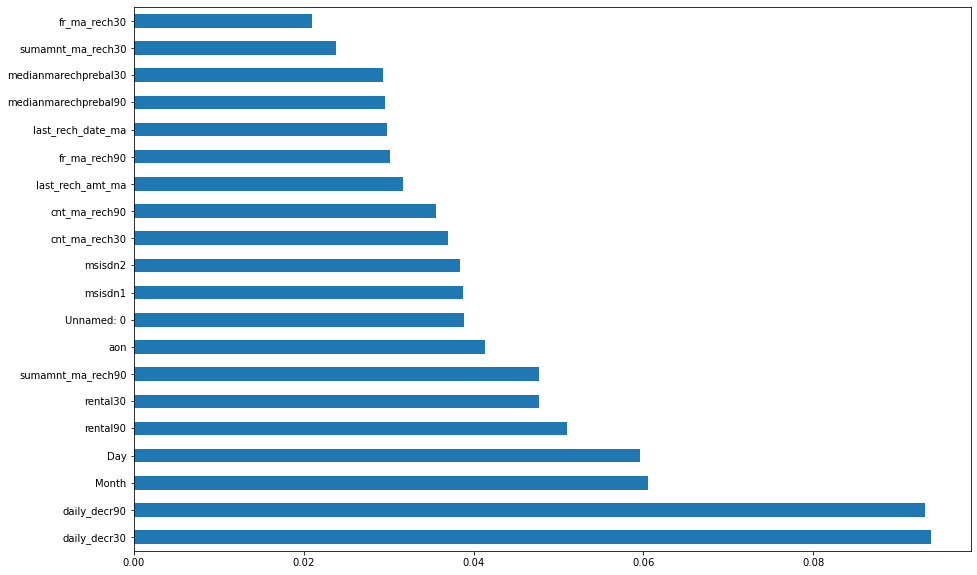

In [298]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X_train,y_train)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh',figsize=(15,10))
plt.show()

In [299]:
X_train.drop(['msisdn1','msisdn2','Day','Month','medianmarechprebal30','medianmarechprebal90','medianamnt_ma_rech30',
         'medianamnt_ma_rech90','maxamnt_loans30','maxamnt_loans90','Unnamed: 0','pcircle','Year'],inplace=True,axis=1)

###### selected features

In [300]:
X_train.columns

Index(['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_amt_ma', 'cnt_ma_rech30',
       'fr_ma_rech30', 'sumamnt_ma_rech30', 'cnt_ma_rech90', 'fr_ma_rech90',
       'sumamnt_ma_rech90', 'cnt_loans30', 'amnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'payback30', 'payback90'],
      dtype='object')

In [301]:
y_train.columns

Index(['label'], dtype='object')

###### Target Variable is Unbalanced

<AxesSubplot:ylabel='None'>

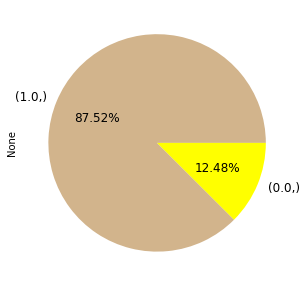

In [302]:
y_train.value_counts().plot(kind = "pie",autopct='%1.2f%%',fontsize=12,figsize=(5,5),colors = ['tan','yellow'])

In [303]:
#Balance the target variable

In [304]:
# define dataset
X_train, y_train = make_classification(n_samples=10000, weights=[0.99], flip_y=0)
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(X_train, y_train)
  
# print the features and the labels
print('x_smote:', x_smote.shape)
print('\ny_smote:', y_smote.shape)

x_smote: (19800, 20)

y_smote: (19800,)


###### Normilization of data

In [305]:
from sklearn.preprocessing import power_transform
X=power_transform(x_smote,method='yeo-johnson')
X

array([[ 1.49512850e+00, -3.02025528e-01, -1.62992480e+00, ...,
        -9.47321987e-01,  5.60706682e-01,  1.25431905e+00],
       [ 1.43929272e-01, -8.48357494e-01,  2.06212984e+00, ...,
         1.15450531e+00,  5.90112104e-01, -2.77674186e-01],
       [ 6.00054452e-01, -1.17255877e+00,  3.14482130e-01, ...,
         4.63985660e-01,  2.92912283e-01, -3.60127642e-01],
       ...,
       [ 4.10001138e-01,  7.22902562e-01, -4.89504014e-01, ...,
        -1.06642740e-03, -1.69282380e+00,  1.53411584e+00],
       [-2.56434995e-01,  9.65673365e-01,  6.09383783e-01, ...,
         1.54201694e+00,  2.13418229e-01, -8.86824757e-02],
       [ 8.52848390e-01,  9.00690212e-01,  9.30329858e-01, ...,
         2.63573314e-01, -3.37948058e-01,  1.63138599e+00]])

###### Splitting Dataset into train and test set

In [306]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y_smote, test_size = 0.25, random_state = 44)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(14850, 20)
(14850,)
(4950, 20)
(4950,)


###### Standardization of data

In [307]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
print(x_train)
x_test = sc.fit_transform(x_test)
print(x_test)

[[-0.6383442  -1.19382691 -0.67290619 ...  0.37396035  1.15642107
  -0.52432086]
 [-1.87092934 -0.10820745 -1.57213534 ... -2.19517125 -0.28666723
   0.70305472]
 [-0.78495397 -1.06668653 -0.14483023 ...  0.72856159 -1.10477792
   0.91898417]
 ...
 [-0.16522982  0.34377039 -0.44483538 ... -0.74288693  0.20817634
  -0.02807642]
 [ 0.92112737 -0.97220489 -0.16673642 ...  1.23367528 -0.07904435
   1.06774849]
 [-2.21501161  0.66073775 -0.06136867 ... -0.1779755   0.61370798
  -0.49888771]]
[[-0.53422526 -1.05463273  0.6234434  ... -2.06023717 -0.1701547
   0.88216361]
 [-1.59011798  1.47616074  1.27783648 ...  0.79332849 -0.17006819
  -0.00417478]
 [-1.0282907   0.91995646  1.13204648 ... -0.25678549  0.63980033
  -1.28073946]
 ...
 [ 0.15941409  0.76973935 -0.27693122 ...  1.28368262 -1.29140312
  -1.11908576]
 [ 0.32263138 -0.75460339  0.49334274 ... -0.9289468   0.65862814
  -1.11208245]
 [-0.35860573 -1.09924234 -0.67807158 ... -0.41435468 -0.7698807
  -0.70323874]]


###### Model Building

In [308]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,roc_curve,auc, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV, cross_val_score

#from sklearn.metrics import precision_score, recall_score, precision_recall_fscore_support
#from sklearn.metrics import f1_score,precision_recall_curve


In [309]:
models=[]
models1 = []
actime=[]

Z = [DecisionTreeClassifier(), LogisticRegression(), KNeighborsClassifier(),
    RandomForestClassifier(), GradientBoostingClassifier(), AdaBoostClassifier()] 
X = ["DecisionTreeClassifier", "LogisticRegression", "KNeighborsClassifier",
    "RandomForestClassifier", "GradientBoostingClassifier", "AdaBoostClassifier"]
for i in range(0,len(Z)):
    model = Z[i]
    start = timeit.default_timer()
    model=model.fit( x_train , y_train )
    pred = model.predict(x_test)
    models.append(accuracy_score(pred , y_test))
    models1.append(model.score(x_train , y_train))
    stop = timeit.default_timer()
    acc_time=stop - start
    actime.append(acc_time)

In [310]:
d = {"Training Accuracy":models1,"Testing Accuracy" : models,"Timer1":actime}
data_frame1 = pd.DataFrame(d,index=X)
data_frame1

Training Accuracy  Testing Accuracy     Timer1
DecisionTreeClassifier               1.000000          0.992121   0.420165
LogisticRegression                   0.969832          0.969495   0.085689
KNeighborsClassifier                 0.987205          0.983232   8.895205
RandomForestClassifier               1.000000          0.998182   6.648128
GradientBoostingClassifier           0.998990          0.994949  14.485695
AdaBoostClassifier                   0.993131          0.989899   3.374438

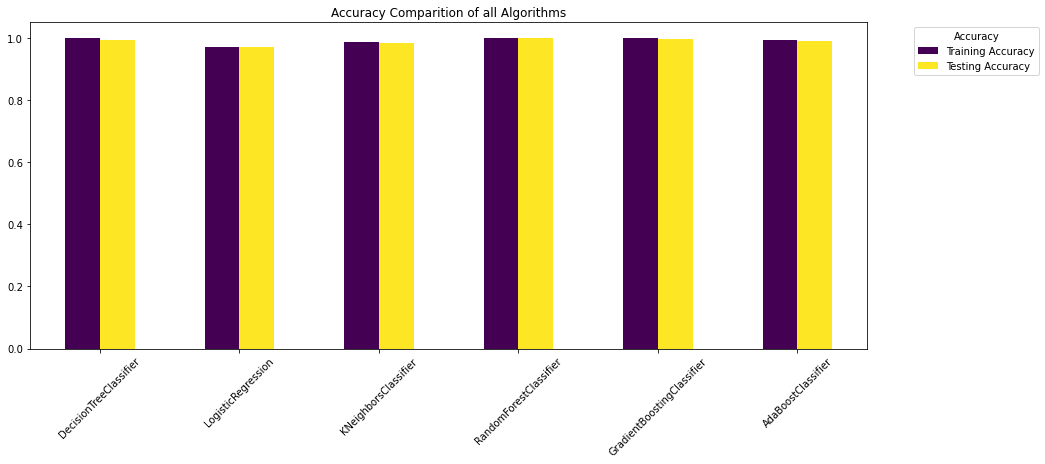

In [311]:
data_frame1[['Training Accuracy','Testing Accuracy']].plot(kind='bar',figsize=(15,6),title='Accuracy Comparition of all Algorithms',colormap='viridis')
plt.xticks(rotation=45)
plt.legend(title = 'Accuracy',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

###### Evaluation

###### Classification Report

In [312]:
models2=[]
models3=[]

for i in range(0,len(Z)):
    model = Z[i]
    model=model.fit( x_train , y_train )
    pred = model.predict(x_test)
    Class_Report=metrics.classification_report(y_test, pred)
    models2.append(Class_Report)
    print("Model Name :",model,"\n",Class_Report)
    f1sc=metrics.f1_score(y_test, pred, average='weighted')
    models3.append(f1sc)
    print("Testing Accuracy of Data with Model",model,":",round(f1sc,2),"\n")

Model Name : DecisionTreeClassifier() 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2475
           1       0.99      0.99      0.99      2475

    accuracy                           0.99      4950
   macro avg       0.99      0.99      0.99      4950
weighted avg       0.99      0.99      0.99      4950

Testing Accuracy of Data with Model DecisionTreeClassifier() : 0.99 

Model Name : LogisticRegression() 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      2475
           1       0.97      0.97      0.97      2475

    accuracy                           0.97      4950
   macro avg       0.97      0.97      0.97      4950
weighted avg       0.97      0.97      0.97      4950

Testing Accuracy of Data with Model LogisticRegression() : 0.97 

Model Name : KNeighborsClassifier() 
               precision    recall  f1-score   support

           0       1.00      0.97      0.

In [313]:
d2 = {"Accuracy of Testing Data" : models3}
data_frame2 = pd.DataFrame(d2,index=X)
data_frame2

Accuracy of Testing Data
DecisionTreeClassifier                      0.991515
LogisticRegression                          0.969495
KNeighborsClassifier                        0.983228
RandomForestClassifier                      0.998384
GradientBoostingClassifier                  0.994949
AdaBoostClassifier                          0.989899

In [314]:
df4=pd.concat([data_frame1,data_frame2],axis=1)
df4[['Training Accuracy','Testing Accuracy','Accuracy of Testing Data']]

Training Accuracy  Testing Accuracy  \
DecisionTreeClassifier               1.000000          0.992121   
LogisticRegression                   0.969832          0.969495   
KNeighborsClassifier                 0.987205          0.983232   
RandomForestClassifier               1.000000          0.998182   
GradientBoostingClassifier           0.998990          0.994949   
AdaBoostClassifier                   0.993131          0.989899   

                            Accuracy of Testing Data  
DecisionTreeClassifier                      0.991515  
LogisticRegression                          0.969495  
KNeighborsClassifier                        0.983228  
RandomForestClassifier                      0.998384  
GradientBoostingClassifier                  0.994949  
AdaBoostClassifier                          0.989899

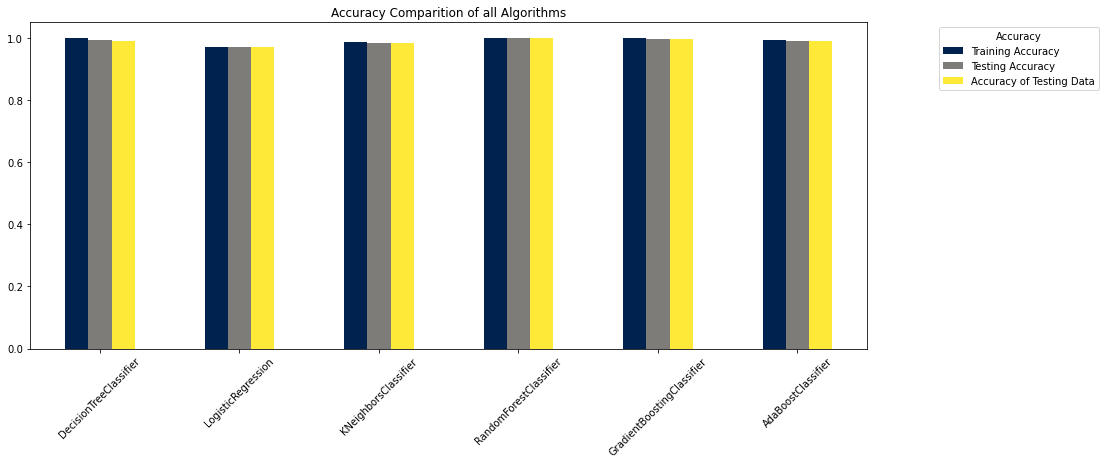

In [315]:
df4[['Training Accuracy','Testing Accuracy','Accuracy of Testing Data']].plot(kind='bar',figsize=(15,6),title='Accuracy Comparition of all Algorithms',colormap='cividis')
plt.xticks(rotation=45)
plt.legend(title = 'Accuracy',bbox_to_anchor=(1.08, 1), loc='upper left')
plt.show()

###### Confusion Matrix

In [316]:
cmodel=[]
for i in range(0,len(Z)):
    model = Z[i]
    model=model.fit( x_train , y_train )
    pred = model.predict(x_test)
    cm = np.array(confusion_matrix(y_test, pred, labels=[1,0]))
    cmodel.append(cm)
     

dc={"Confusion Matrix":cmodel}    
conf_mat=pd.DataFrame(dc,index=X)

conf_mat

Confusion Matrix
DecisionTreeClassifier      [[2448, 27], [15, 2460]]
LogisticRegression          [[2395, 80], [71, 2404]]
KNeighborsClassifier         [[2475, 0], [83, 2392]]
RandomForestClassifier        [[2471, 4], [4, 2471]]
GradientBoostingClassifier   [[2456, 19], [7, 2468]]
AdaBoostClassifier          [[2443, 32], [18, 2457]]

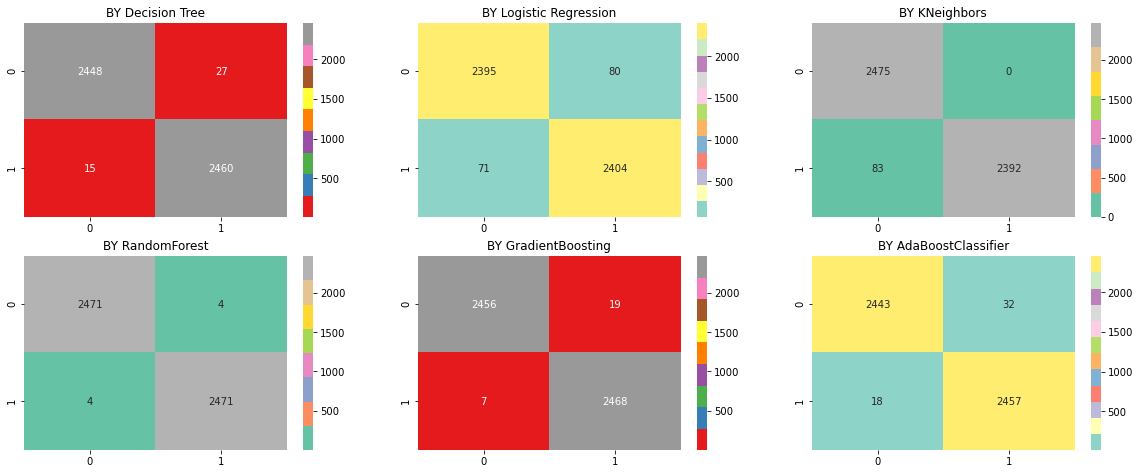

In [317]:
plt.figure(figsize=(20,25))
plt.subplot(6,3,1)
sns.heatmap(cmodel[0],annot=True,fmt='g',cmap='Set1')
plt.title("BY Decision Tree")
plt.subplot(6,3,2)
sns.heatmap(cmodel[1],annot=True,fmt='g',cmap='Set3')
plt.title("BY Logistic Regression")
plt.subplot(6,3,3)
sns.heatmap(cmodel[2],annot=True,fmt='g',cmap='Set2')
plt.title("BY KNeighbors")  
plt.subplot(6,3,4)
sns.heatmap(cmodel[3],annot=True,fmt='g',cmap='Set2')
plt.title("BY RandomForest")
plt.subplot(6,3,5)
sns.heatmap(cmodel[4],annot=True,fmt='g',cmap='Set1')
plt.title("BY GradientBoosting")
plt.subplot(6,3,6)
sns.heatmap(cmodel[5],annot=True,fmt='g',cmap='Set3')
plt.title("BY AdaBoostClassifier")
plt.show()   


###### Validation

In [318]:
vmodel=[]
acvalmodel=[]
actime3=[]
for i in range(0,len(Z)):
    model = Z[i]
    start = timeit.default_timer()
    model.fit( x_train , y_train )
    pred = model.predict(x_test)
    acval=cross_val_score(model,x_train , y_train, cv=10, scoring='f1_weighted')
    acvalmodel.append(acval)
    print('\n',model,' 10-fold Cross Validation:')
    print('Accuracy value :',acval)
    vmodel.append(round(acval.mean(),2))
    print('Final Average Accuracy :',round(acval.mean(),3))
    stop = timeit.default_timer()
    acc_time=stop - start
    actime3.append(acc_time)


 DecisionTreeClassifier()  10-fold Cross Validation:
Accuracy value : [0.99663299 0.99326582 0.99393936 0.99259257 0.99259257 0.99528617
 0.99595956 0.98787872 0.99393939 0.99124579]
Final Average Accuracy : 0.993

 LogisticRegression()  10-fold Cross Validation:
Accuracy value : [0.97104338 0.96902357 0.9690234  0.96430944 0.96700328 0.9750837
 0.97373735 0.95959592 0.9703694  0.96902256]
Final Average Accuracy : 0.969

 KNeighborsClassifier()  10-fold Cross Validation:
Accuracy value : [0.97776713 0.98450823 0.97709272 0.97506912 0.98181239 0.98316002
 0.98316002 0.97709202 0.97911518 0.98113784]
Final Average Accuracy : 0.98

 RandomForestClassifier()  10-fold Cross Validation:
Accuracy value : [1.         1.         1.         0.99730639 0.99865319 0.9993266
 0.9993266  0.99663297 0.99730639 0.99797979]
Final Average Accuracy : 0.999

 GradientBoostingClassifier()  10-fold Cross Validation:
Accuracy value : [0.99865319 0.99461275 0.99393936 0.99393931 0.9979798  0.99730639
 0.9979

In [319]:
dv={"10 fold Cross Validation":acvalmodel,"Final Average Accuracy":vmodel,"Time":actime3}    
cross_val=pd.DataFrame(dv,index=X)
cross_val[["10 fold Cross Validation","Final Average Accuracy"]]

10 fold Cross Validation  \
DecisionTreeClassifier      [0.996632987472001, 0.9932658222572497, 0.9939...   
LogisticRegression          [0.9710433771152376, 0.969023569023569, 0.9690...   
KNeighborsClassifier        [0.9777671314407754, 0.9845082298824483, 0.977...   
RandomForestClassifier      [1.0, 1.0, 1.0, 0.9973063948634685, 0.99865319...   
GradientBoostingClassifier  [0.9986531949887921, 0.9946127457536852, 0.993...   
AdaBoostClassifier          [0.9939393774496017, 0.9865319498879205, 0.989...   

                            Final Average Accuracy  
DecisionTreeClassifier                        0.99  
LogisticRegression                            0.97  
KNeighborsClassifier                          0.98  
RandomForestClassifier                        1.00  
GradientBoostingClassifier                    1.00  
AdaBoostClassifier                            0.99

In [320]:
#visualization of final Accuracy

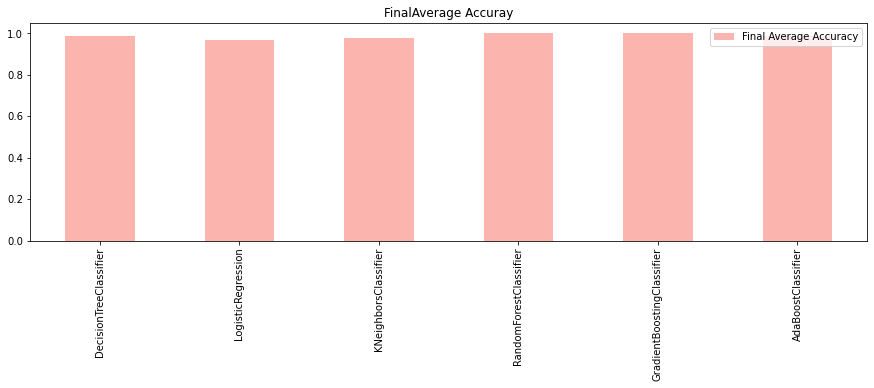

In [321]:
cross_val[['Final Average Accuracy']].plot(kind='bar',figsize=(15,4),title='FinalAverage Accuray',colormap='Pastel1')
plt.show()

In [322]:
#AUC_ROC Curve

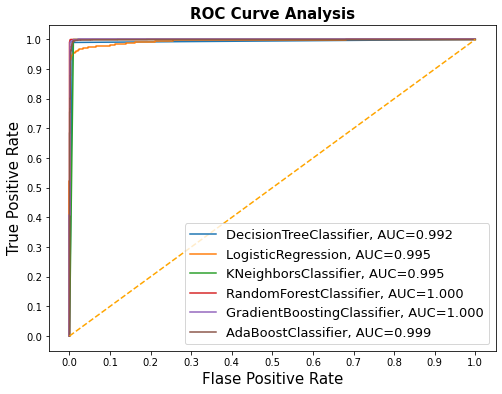

In [324]:
result_table = pd.DataFrame(columns=['Z', 'fpr','tpr','auc'])
for i in range(0,len(Z)):
    model = Z[i]
    model=model.fit( x_train , y_train )
    ypred = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = roc_curve(y_test,  ypred)
    auc = roc_auc_score(y_test, ypred)
    result_table = result_table.append({'model':model.__class__.__name__,'fpr':fpr,'tpr':tpr,'auc':auc},ignore_index=True)
result_table.set_index('model', inplace=True)

fig = plt.figure(figsize=(8,6))
for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'],result_table.loc[i]['tpr'],label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))

plt.plot([0,1], [0,1], color='orange', linestyle='--')
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')
plt.show()

###### Model Comparision

In [325]:
dfcomp=pd.concat([data_frame1,cross_val],axis=1)
dfcomp[['Training Accuracy','Testing Accuracy','Final Average Accuracy','Time']].head(6)

Training Accuracy  Testing Accuracy  \
DecisionTreeClassifier               1.000000          0.992121   
LogisticRegression                   0.969832          0.969495   
KNeighborsClassifier                 0.987205          0.983232   
RandomForestClassifier               1.000000          0.998182   
GradientBoostingClassifier           0.998990          0.994949   
AdaBoostClassifier                   0.993131          0.989899   

                            Final Average Accuracy        Time  
DecisionTreeClassifier                        0.99    4.716321  
LogisticRegression                            0.97    0.842802  
KNeighborsClassifier                          0.98    8.349663  
RandomForestClassifier                        1.00   59.375551  
GradientBoostingClassifier                    1.00  142.508644  
AdaBoostClassifier                            0.99   31.805451

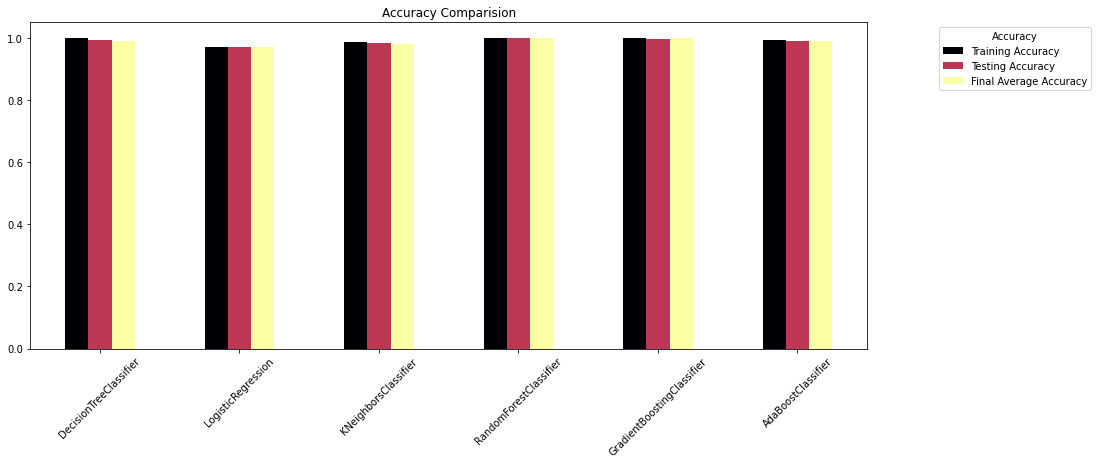

In [326]:
dfcomp[['Training Accuracy','Testing Accuracy','Final Average Accuracy']].plot(kind='bar',figsize=(15,6),title='Accuracy Comparision',colormap='inferno')
plt.xticks(rotation=45)
plt.legend(title = 'Accuracy',bbox_to_anchor=(1.08, 1), loc='upper left')
plt.show()

In [329]:
algorithms = {
    'DecisionTreeClassifier' : {
        'model' : DecisionTreeClassifier(),
        'param' : {
            'criterion': ['gini', 'entropy'],
            'splitter': ['best','random'],
            'max_depth': [2,4,6,8,10,12],
            'min_samples_split' : [0.0,1.0],
            'min_weight_fraction_leaf' : [0.0,0.5],
            'max_features' : ['auto','sqrt','log2'],
            'ccp_alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
            'max_leaf_nodes' : [4,6,12,10,25,50],
            'class_weight' : [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}]
        }
    },
    'LogisticRegression' : {
        'model' : LogisticRegression(),
        'param' : {
            'penalty' : ['l1', 'l2', 'elasticnet'],
            'C' : [0.1, 0.2, 0.3, 0.4, 0.5],
            'max_iter' : [10, 50,5,90, 200, 110, 500, 1000],
            'solver' : ['newton-cg', 'liblinear', 'sag', 'saga'],
            'verbose' : [1,5,4,10,30,15,20,100],
            'class_weight' : [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}],
            'multi_class' : ['ovr', 'multinomial'],
            'n_jobs' : [1,5,10, 100,200,500]

        }
    },
    'KNeighborsClassifier' : {
        'model' : KNeighborsClassifier(),
        'param' : {
            'n_neighbors' : [1,5,4,10,30,15,20,100],
            'weights' : ['uniform','distance'],
            'algorithm' : ['auto','ball_tree','kd_tree','brute'],
            'leaf_size' : [1,2,4,6,12,10,25,50],
            'p' : [1,2,5,7,10,20,24],
            'n_jobs' : [1,5,10, 100,200,500]

        }
    },
    'RandomForestClassifier' : {
        'model' : RandomForestClassifier(),
        'param' : {
            'n_estimators' : [10, 50,5,90, 200, 110, 500, 1000],
            'criterion' : ['gini', 'entropy'],
            'max_depth' : [2,4,6,8,10,12],
            'min_samples_split' : [0.0,1.0],
            'min_samples_leaf' : [0.0, 0.5,1],
            'min_weight_fraction_leaf' : [0.0, 0.5],
            'max_features' : ['auto','sqrt','log2'],
            'max_leaf_nodes' : [4,6,12,10,25,50],
            'class_weight' : [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}],
            'verbose' : [1,5,4,10,30,15,20,100],
            'random_state' : [1,5,10, 100,200,500],
            'n_jobs' : [1,5,10, 100,200,500]

        }
    },
    'GradientBoostingClassifier' : {
        'model' : GradientBoostingClassifier(),
        'param' : {
            'loss': ['deviance','exponential'],
            'learning_rate' : [0.5, 0.8, 0.1, 0.20, 0.25, 0.30],
            'n_estimators' : [300, 500, 700, 1000, 2100],
            'subsample' : [0,1],
            'min_samples_split' : [0.0,1.0],
            'min_samples_leaf' : [0.0, 0.5,1],
            'min_weight_fraction_leaf' : [0.0,0.5],
            'max_depth' : [3,6,9,10,12,20,25],
            'max_features' : ['auto', 'sqrt', 'log2']
        }
    },
    'AdaBoostClassifier' : {
        'model' : AdaBoostClassifier(),
        'param' : {
            'n_estimators' : [2,4,6,8,10,12],
            'learning_rate' : [1.5,3.4,5.6,9.2,10.2],
            'random_state' : [1,5,10, 100,200,500],
            'algorithm' : ['SAMME','SAMME.R']

        }
    }
}

In [330]:
score = []
for name, mp in algorithms.items() :
    rs = RandomizedSearchCV(estimator = mp['model'], param_distributions = mp['param'], cv = 10, n_jobs=-1, verbose=3)
    rs.fit(x_train, y_train)
    score.append({'model': name,'score' : rs.best_score_,'params' : rs.best_params_})  

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
[LibLinear]Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  

building tree 1 of 90
building tree 2 of 90
building tree 3 of 90
building tree 4 of 90
building tree 5 of 90
building tree 6 of 90
building tree 7 of 90
building tree 8 of 90
building tree 9 of 90
building tree 10 of 90
building tree 11 of 90
building tree 12 of 90
building tree 13 of 90
building tree 14 of 90
building tree 15 of 90
building tree 16 of 90
building tree 17 of 90
building tree 18 of 90
building tree 19 of 90
building tree 20 of 90
building tree 21 of 90
building tree 22 of 90
building tree 23 of 90
building tree 24 of 90
building tree 25 of 90
building tree 26 of 90
building tree 27 of 90
building tree 28 of 90
building tree 29 of 90
building tree 30 of 90
building tree 31 of 90
building tree 32 of 90
building tree 33 of 90
building tree 34 of 90
building tree 35 of 90
building tree 36 of 90
building tree 37 of 90
building tree 38 of 90
building tree 39 of 90
building tree 40 of 90
building tree 41 of 90
building tree 42 of 90
building tree 43 of 90
building tree 44 of 

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    0.4s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [331]:
final=pd.DataFrame(score,columns=['model','score','params'])
final

model     score  \
0      DecisionTreeClassifier  0.584310   
1          LogisticRegression  0.974276   
2        KNeighborsClassifier  0.982155   
3      RandomForestClassifier  0.500000   
4  GradientBoostingClassifier  0.499663   
5          AdaBoostClassifier  0.964310   

                                              params  
0  {'splitter': 'random', 'min_weight_fraction_le...  
1  {'verbose': 1, 'solver': 'liblinear', 'penalty...  
2  {'weights': 'distance', 'p': 7, 'n_neighbors':...  
3  {'verbose': 20, 'random_state': 200, 'n_jobs':...  
4  {'subsample': 1, 'n_estimators': 700, 'min_wei...  
5  {'random_state': 1, 'n_estimators': 10, 'learn...

###### Final Model

*Choosing the Logistic Regression as Final Model Because Logistic Regression Test Accuray and Train Accuracy*<br>
*are approx equal and its final Accuracy is greater than test Accuracy and train Accuracy*<br>
*Best Score after Hyperparameter tuning is more than Test Accuracy,Train Accuracy and equal to Final Accuracy*
<br>*process time is less than other models*

###### Retraining the Model

In [360]:
#Full Dataset

In [361]:
y_train=df[['label']]
X_train=df.drop(['label'],axis=1)

In [362]:
PScaler=StandardScaler()
PScalerFit=PScaler.fit(X_train)

x_train=PScalerFit.transform(X_train)

print("x_train :",x_train.shape)
print("y_train :",y_train.shape)


x_train : (209593, 32)
y_train : (209593, 1)


In [363]:
clf = LogisticRegression(verbose=30,penalty='l2',C= 0.5,max_iter=90,solver='sag',class_weight={1:0.5, 0:0.5},multi_class='ovr',n_jobs=10)

finalRF=clf.fit(x_train,y_train)
print("Accuracy :", finalRF.score(x_train, y_train))

paccval=cross_val_score(finalRF, x_train , y_train, cv=5, scoring='f1_weighted')
print('\n\nCross Validation')
print('Accuracy values:',paccval)

print('\nFinal Average Accuracy of the model:', round(paccval.mean(),2))

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.


convergence after 74 epochs took 15 seconds
Accuracy : 0.8897148282623942


[Parallel(n_jobs=10)]: Done   1 tasks      | elapsed:   15.2s
[Parallel(n_jobs=10)]: Done   1 out of   1 | elapsed:   15.2s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   1 tasks      | elapsed:   17.3s
[Parallel(n_jobs=10)]: Done   1 out of   1 | elapsed:   17.4s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   1 tasks      | elapsed:   14.5s
[Parallel(n_jobs=10)]: Done   1 out of   1 | elapsed:   14.5s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   1 tasks      | elapsed:   15.3s
[Parallel(n_jobs=10)]: Done   1 out of   1 | elapsed:   15.4s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   1 tasks      | elapsed:   14.0s
[Parallel(n_jobs=10)]: Done   1 out of   1 | elapsed:   14.1s finished
[Parallel(n_jobs=10)]: Usin



Cross Validation
Accuracy values: [0.86511962 0.86382376 0.86481024 0.86850861 0.86551442]

Final Average Accuracy of the model: 0.87


[Parallel(n_jobs=10)]: Done   1 tasks      | elapsed:   15.8s
[Parallel(n_jobs=10)]: Done   1 out of   1 | elapsed:   15.8s finished


###### Model Saving

In [364]:
import pickle
filename='MicroCreditDefaulter.pk1'
pickle.dump(model,open(filename,'wb'))
print("Model Saved")

Model Saved
